In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import plotly.express as px
import plotly.graph_objects as go
import os
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
%matplotlib inline

In [2]:
df=pd.read_csv("/kaggle/input/test01/parkinsons.csv")

$ Parkinson's Dataset - Column Descriptions
-------------------------------------------

> name
  - Type       : String
  - Description: Unique ID for each voice recording (e.g., phon_R01_S01_1)
  - Purpose    : Identifies the subject and recording session

> MDVP:Fo(Hz)
  - Type       : Float
  - Description: Fundamental frequency (avg vocal pitch) in Hertz
  - Purpose    : Measures the baseline pitch of the voice

> MDVP:Fhi(Hz)
  - Type       : Float
  - Description: Maximum fundamental frequency
  - Purpose    : Indicates vocal range upper limit

> MDVP:Flo(Hz)
  - Type       : Float
  - Description: Minimum fundamental frequency
  - Purpose    : Indicates vocal range lower limit

> MDVP:Jitter(%)
  - Type       : Float
  - Description: Percent variation in pitch between cycles
  - Purpose    : Detects pitch perturbation in Parkinson’s patients

> MDVP:Jitter(Abs)
  - Type       : Float
  - Description: Absolute jitter (in seconds)
  - Purpose    : Measures average absolute pitch difference

> MDVP:RAP
  - Type       : Float
  - Description: Relative Average Perturbation
  - Purpose    : Short-term pitch perturbation metric

> MDVP:PPQ
  - Type       : Float
  - Description: Pitch Perturbation Quotient
  - Purpose    : Longer-term pitch variability

> Jitter:DDP
  - Type       : Float
  - Description: Difference of Differences of Periods
  - Purpose    : Combines jitter metrics for deeper pitch variability analysis

> MDVP:Shimmer
  - Type       : Float
  - Description: Amplitude variation between cycles
  - Purpose    : Detects vocal amplitude instability

> MDVP:Shimmer(dB)
  - Type       : Float
  - Description: Shimmer in decibels
  - Purpose    : Measures amplitude perturbation in logarithmic scale

> Shimmer:APQ3
  - Type       : Float
  - Description: Amplitude Perturbation Quotient over 3 cycles
  - Purpose    : Short-term amplitude irregularity

> Shimmer:APQ5
  - Type       : Float
  - Description: Amplitude Perturbation Quotient over 5 cycles
  - Purpose    : Mid-term amplitude fluctuation

> MDVP:APQ
  - Type       : Float
  - Description: General Amplitude Perturbation Quotient
  - Purpose    : Overall amplitude stability indicator

> Shimmer:DDA
  - Type       : Float
  - Description: Difference of Differences of Amplitude
  - Purpose    : Combines shimmer values for a broad measure

> NHR
  - Type       : Float
  - Description: Noise-to-Harmonics Ratio
  - Purpose    : Higher values indicate breathiness or hoarseness

> HNR
  - Type       : Float
  - Description: Harmonics-to-Noise Ratio
  - Purpose    : Indicates clarity of voice signal

> status
  - Type       : Integer (Binary)
  - Description: 1 = Parkinson’s, 0 = Healthy
  - Purpose    : Target variable for prediction/classification

> RPDE
  - Type       : Float
  - Description: Recurrence Period Density Entropy
  - Purpose    : Measures voice complexity through nonlinear dynamics

> DFA
  - Type       : Float
  - Description: Detrended Fluctuation Analysis
  - Purpose    : Detects long-term signal correlations

> spread1
  - Type       : Float
  - Description: Nonlinear measure of frequency variation
  - Purpose    : Quantifies pitch irregularities

> spread2
  - Type       : Float
  - Description: Dynamical nonlinear pitch variability
  - Purpose    : Complements spread1 for variability detection

> D2
  - Type       : Float
  - Description: Correlation dimension
  - Purpose    : Reflects voice signal's chaotic structure

> PPE
  - Type       : Float
  - Description: Pitch Period Entropy
  - Purpose    : Measures randomness/irregularity in pitch patterns


In [3]:
df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0           0.00007   0.00370   0.00554     0.01109       0.04374   
1           0.00008   0.00465   0.00696     0.01394       0.06134   
2           0.00009   0.00544   0.00781     0.01633       0.05233   
3           0.00009   0.00502   0.00698     0.01505       0.05492   
4           0.00011   0.00655   0.00908     0.01966       0.06425   

   MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0             0.426       0.02182       0.03130   0.02971      0.06545   
1             0.626       0.03134       0.04518   0.04368      0.09403   
2             0.482       0.02757       0.03858   0.03590      0.08270   
3             0.517       0.02924       0.04005   0.03772      0.08771   
4             0.584       0.03490       0.04825   0.04465      0.10470   

       NHR     HNR  status      RPDE       DFA   spread1   spread2        D2  \
0  0.02211  21.033       1  0.414783  0.815285 -4.813031  0.266482  2.301442   
1  0.01929  19.085       1  0.458359  0.819521 -4.075192  0.335590  2.486855   
2  0.01309  20.651       1  0.429895  0.825288 -4.443179  0.311173  2.342259   
3  0.01353  20.644       1  0.434969  0.819235 -4.117501  0.334147  2.405554   
4  0.01767  19.649       1  0.417356  0.823484 -3.747787  0.234513  2.332180   

        PPE  
0  0.284654  
1  0.368674  
2  0.332634  
3  0.368975  
4  0.410335

In [4]:
df.shape

(195, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
df.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5    MDVP:APQ  Shimmer:DDA  \
count        195.000000    195.000000    195.000000  195.000000   195.000000   
mean           0.282251      0.015664      0.017878    0.024081     0.046993   
std            0.194877      0.010153      0.012024    0.016947     0.030459   
min            0.085000      0.004550      0.005700    0.007190     0.013640   
25%            0.148500      0.008245      0.009580    0.013080     0.024735   
50%            0.221000      0.012790      0.013470    0.018260     0.038360   
75%            0.350000      0.020265      0.022380    0.029400     0.060795   
max            1.302000      0.056470      0.079400    0.137780     0.169420   

              NHR         HNR      status        RPDE         DFA     spread1  \
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000   
mean     0.024847   21.885974    0.753846    0.498536    0.718099   -5.684397   
std      0.040418    4.425764    0.431878    0.103942    0.055336    1.090208   
min      0.000650    8.441000    0.000000    0.256570    0.574282   -7.964984   
25%      0.005925   19.198000    1.000000    0.421306    0.674758   -6.450096   
50%      0.011660   22.085000    1.000000    0.495954    0.722254   -5.720868   
75%      0.025640   25.075500    1.000000    0.587562    0.761881   -5.046192   
max      0.314820   33.047000    1.000000    0.685151    0.825288   -2.434031   

          spread2          D2         PPE  
count  195.000000  195.000000  195.000000  
mean     0.226510    2.381826    0.206552  
std      0.083406    0.382799    0.090119  
min      0.006274    1.423287    0.044539  
25%      0.174351    2.099125    0.137451  
50%      0.218885    2.361532    0.194052  
75%      0.279234    2.636456    0.252980  
max      0.450493    3.671155    0.527367

In [8]:
df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0           0.00007   0.00370   0.00554     0.01109       0.04374   
1           0.00008   0.00465   0.00696     0.01394       0.06134   
2           0.00009   0.00544   0.00781     0.01633       0.05233   
3           0.00009   0.00502   0.00698     0.01505       0.05492   
4           0.00011   0.00655   0.00908     0.01966       0.06425   

   MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0             0.426       0.02182       0.03130   0.02971      0.06545   
1             0.626       0.03134       0.04518   0.04368      0.09403   
2             0.482       0.02757       0.03858   0.03590      0.08270   
3             0.517       0.02924       0.04005   0.03772      0.08771   
4             0.584       0.03490       0.04825   0.04465      0.10470   

       NHR     HNR  status      RPDE       DFA   spread1   spread2        D2  \
0  0.02211  21.033       1  0.414783  0.815285 -4.813031  0.266482  2.301442   
1  0.01929  19.085       1  0.458359  0.819521 -4.075192  0.335590  2.486855   
2  0.01309  20.651       1  0.429895  0.825288 -4.443179  0.311173  2.342259   
3  0.01353  20.644       1  0.434969  0.819235 -4.117501  0.334147  2.405554   
4  0.01767  19.649       1  0.417356  0.823484 -3.747787  0.234513  2.332180   

        PPE  
0  0.284654  
1  0.368674  
2  0.332634  
3  0.368975  
4  0.410335

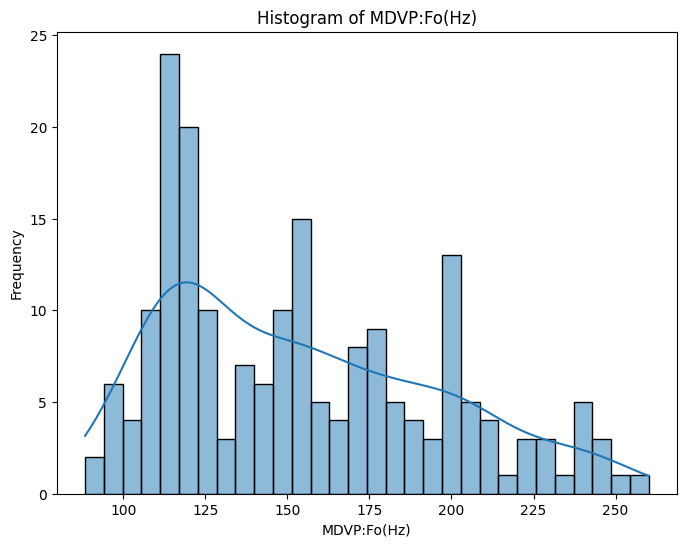

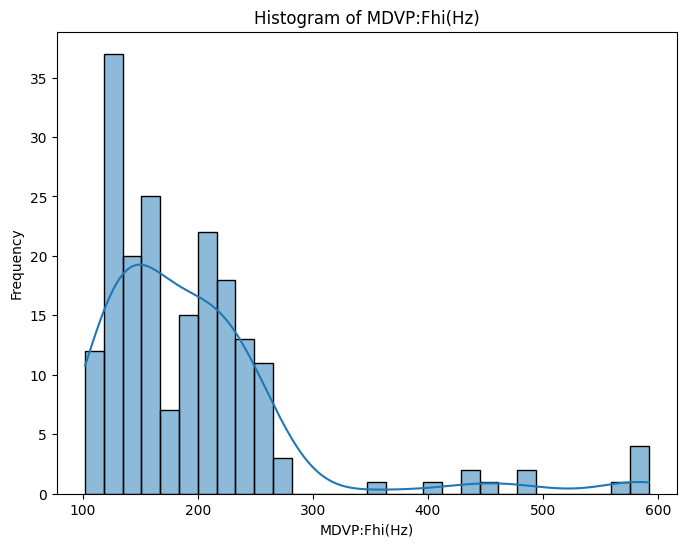

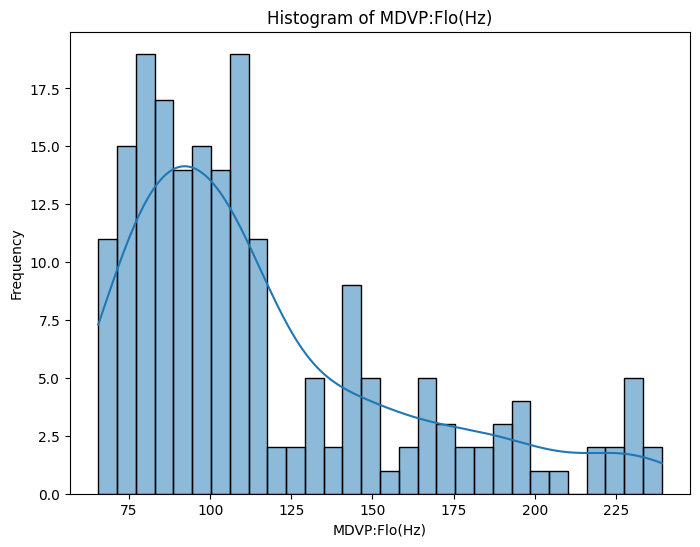

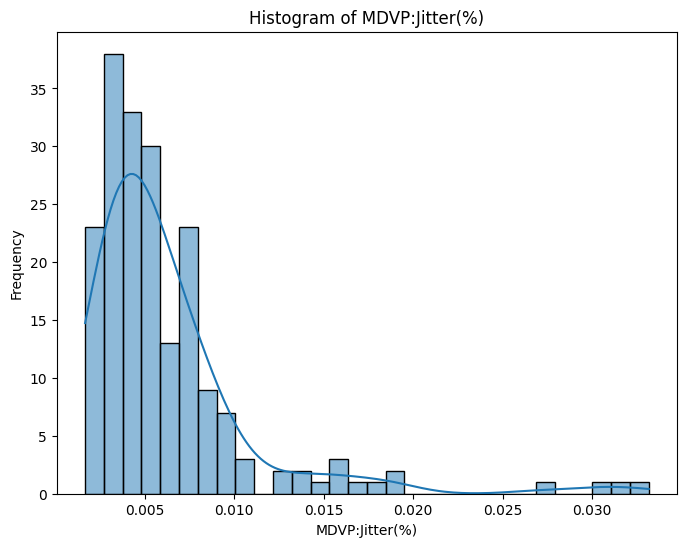

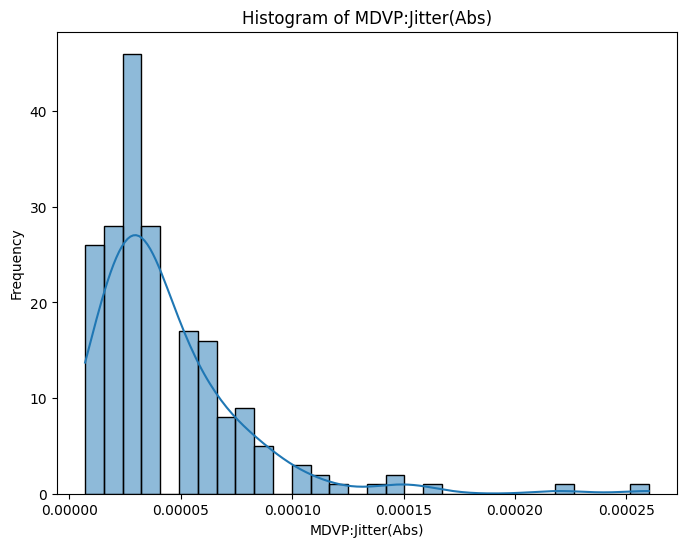

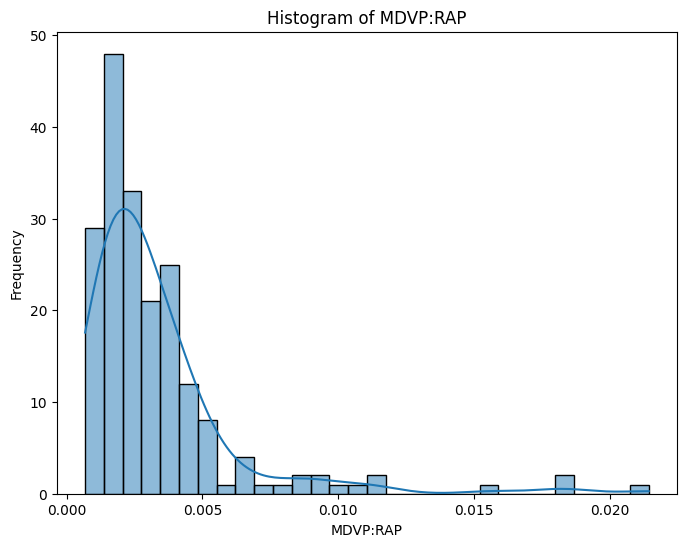

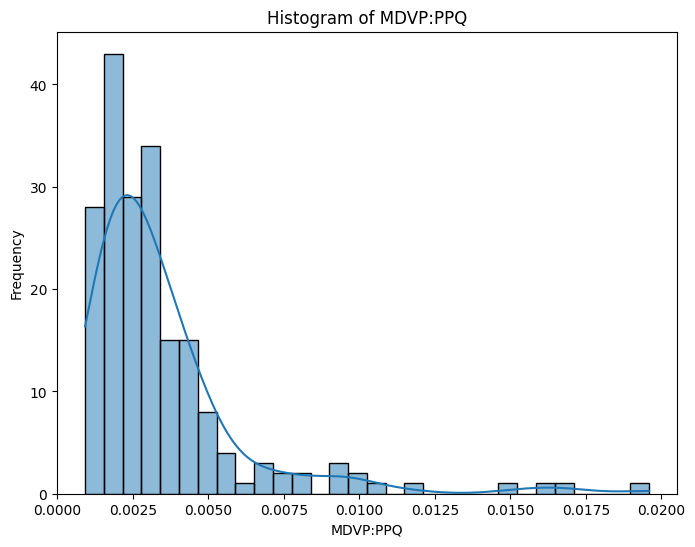

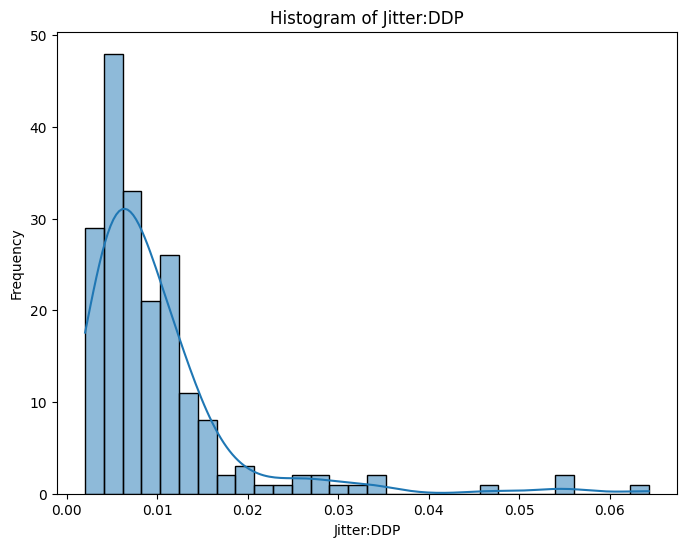

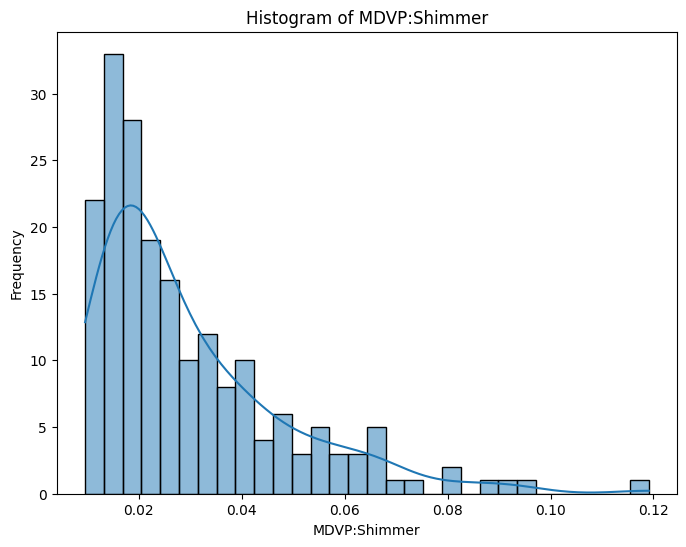

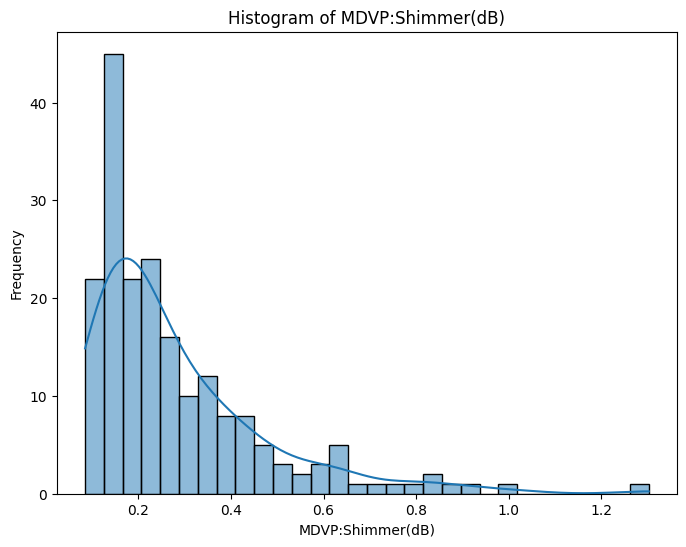

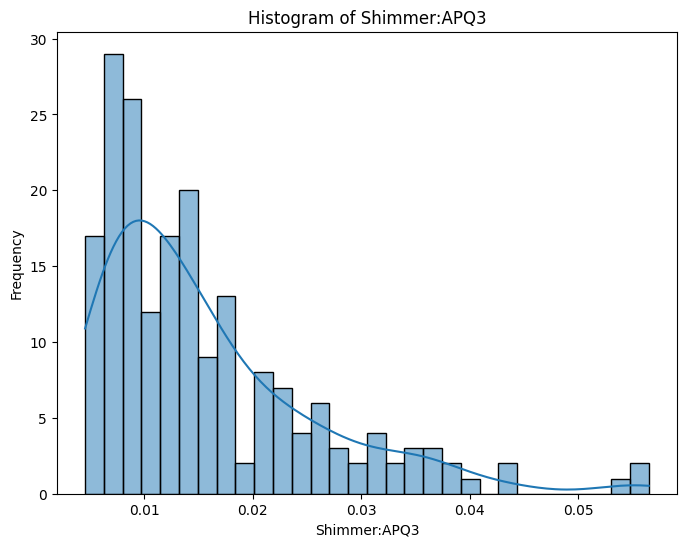

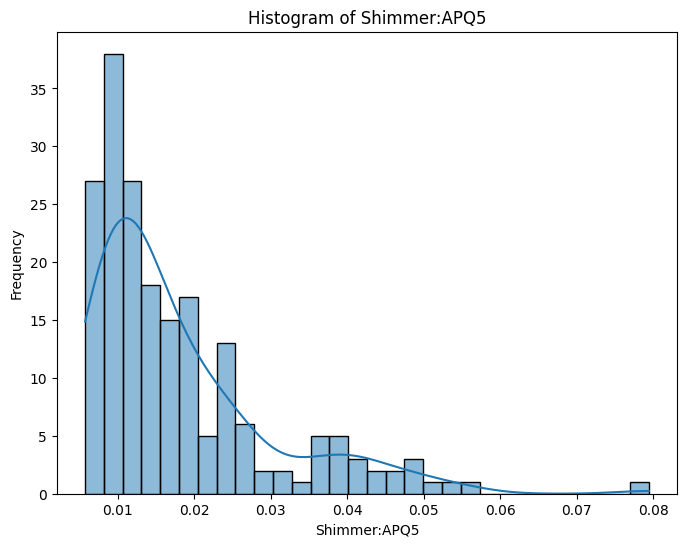

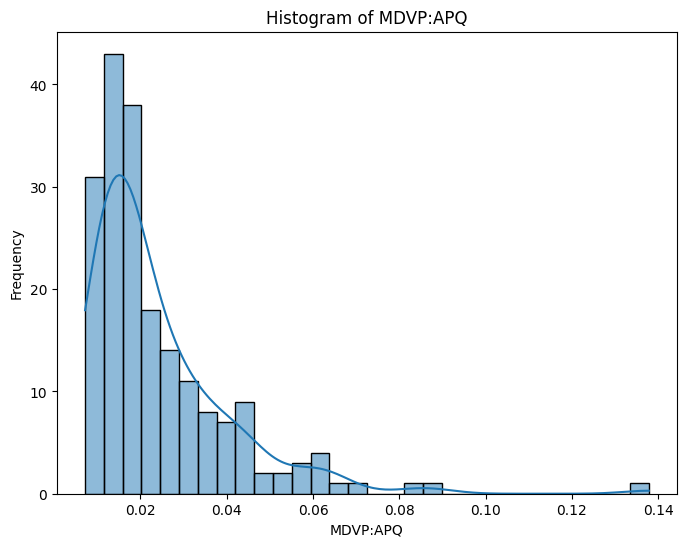

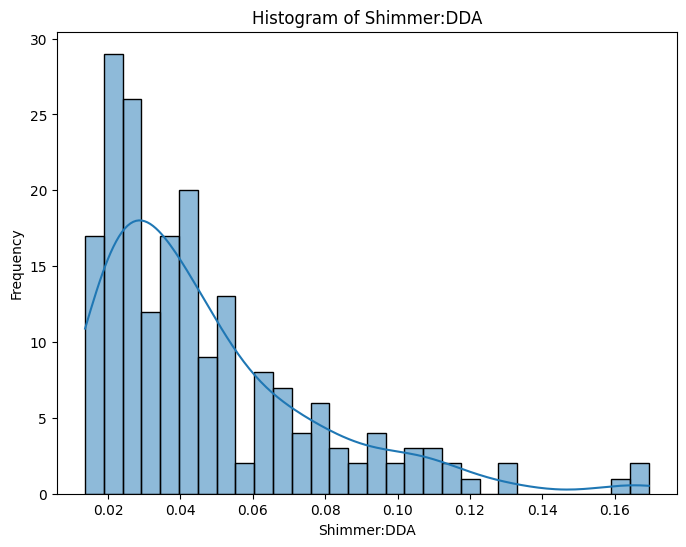

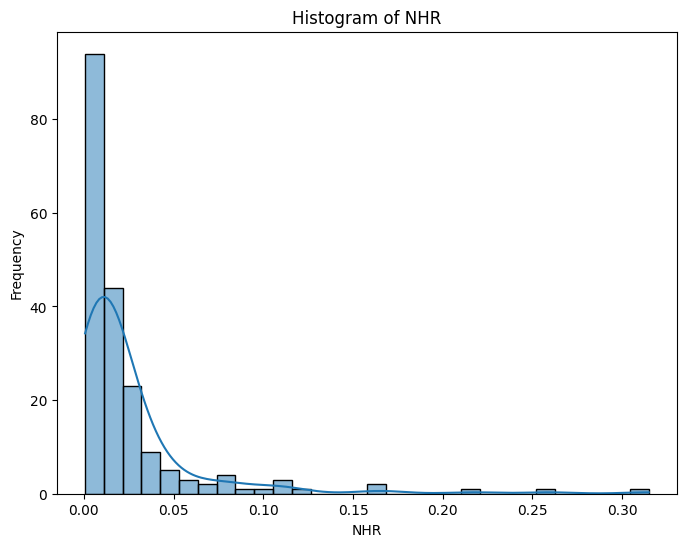

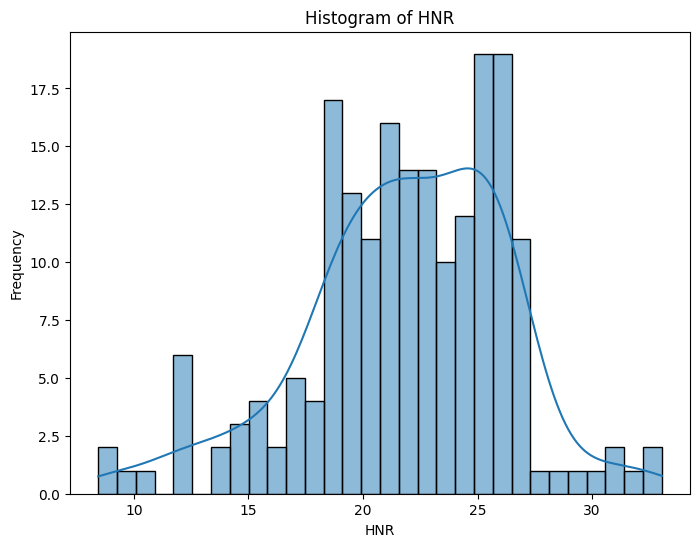

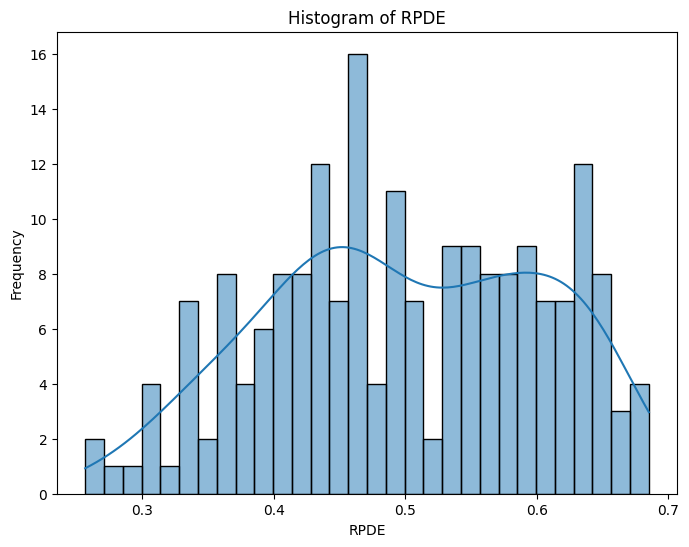

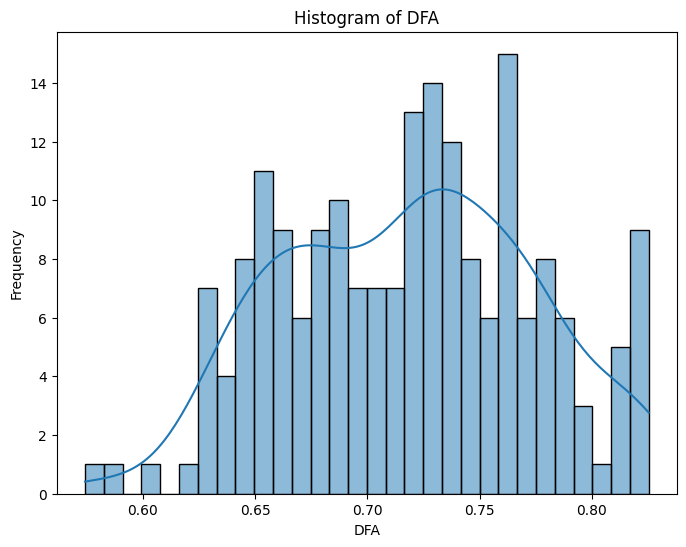

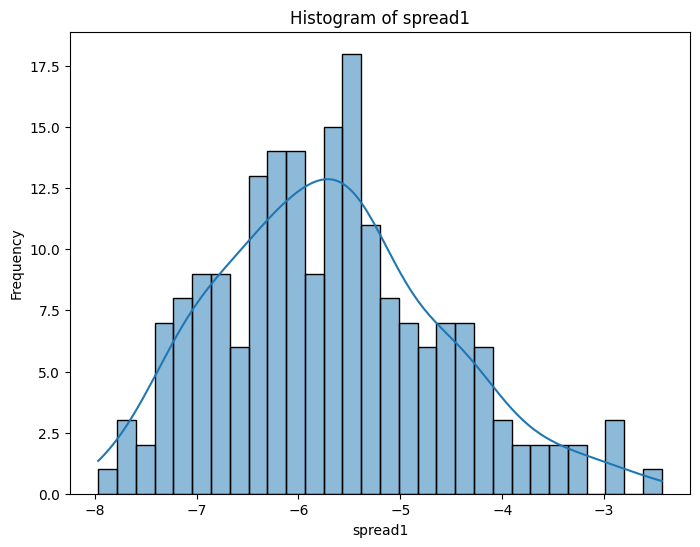

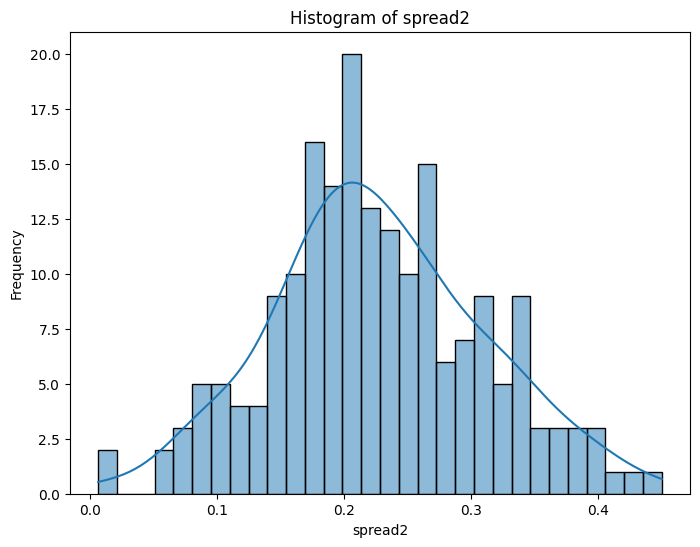

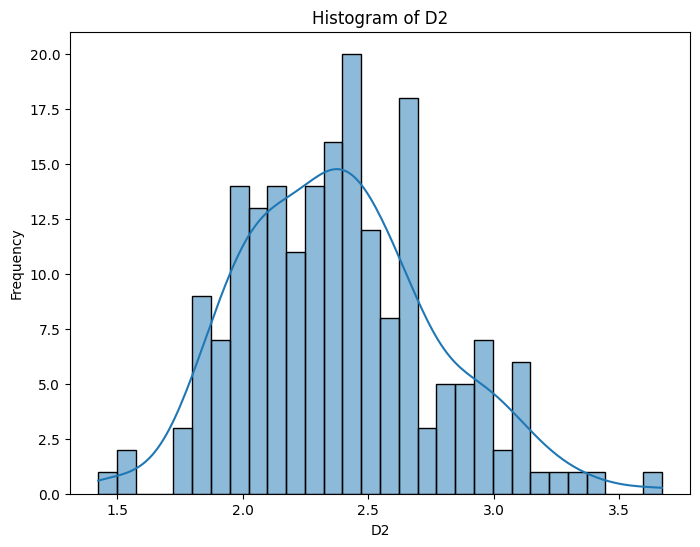

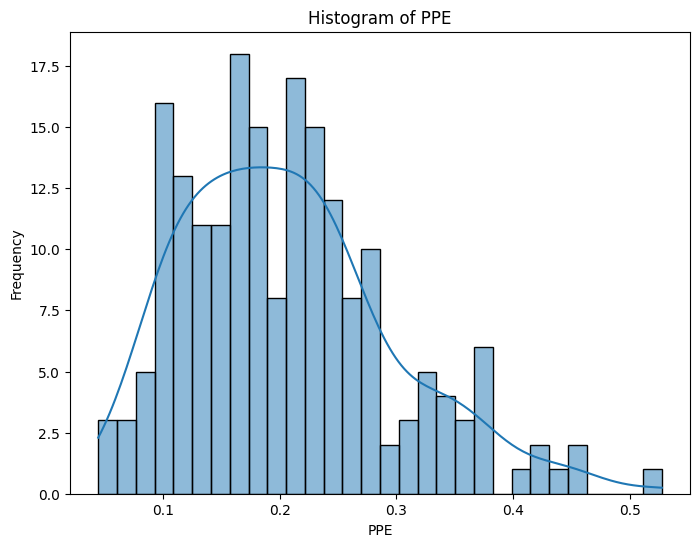

In [9]:
data_numeric = df.drop(columns=['name'])
numeric_cols = data_numeric.columns.drop('status')
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
 

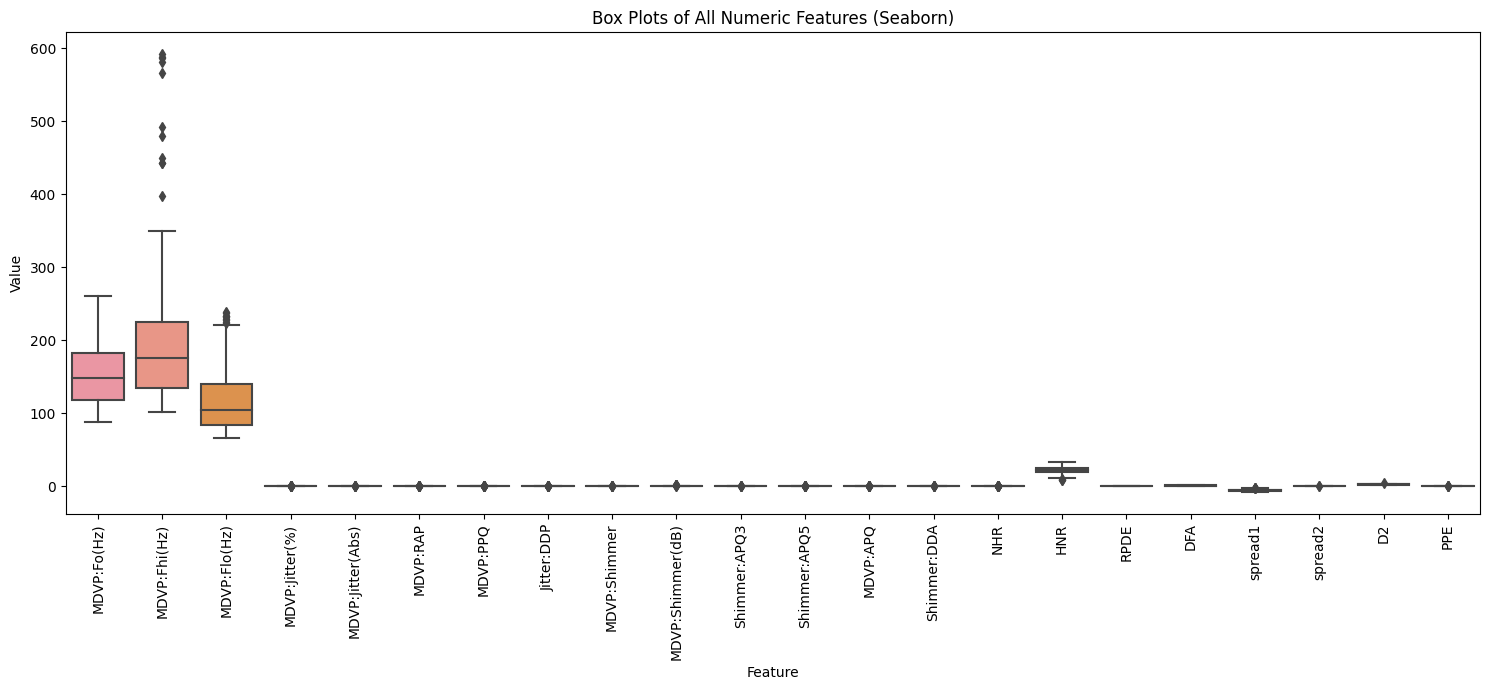

In [10]:
melted_data = data_numeric[numeric_cols].melt(var_name='Feature', value_name='Value')

plt.figure(figsize=(15, 7))
sns.boxplot(x='Feature', y='Value', data=melted_data)
plt.xticks(rotation=90)
plt.title('Box Plots of All Numeric Features (Seaborn)')
plt.tight_layout()
plt.show()

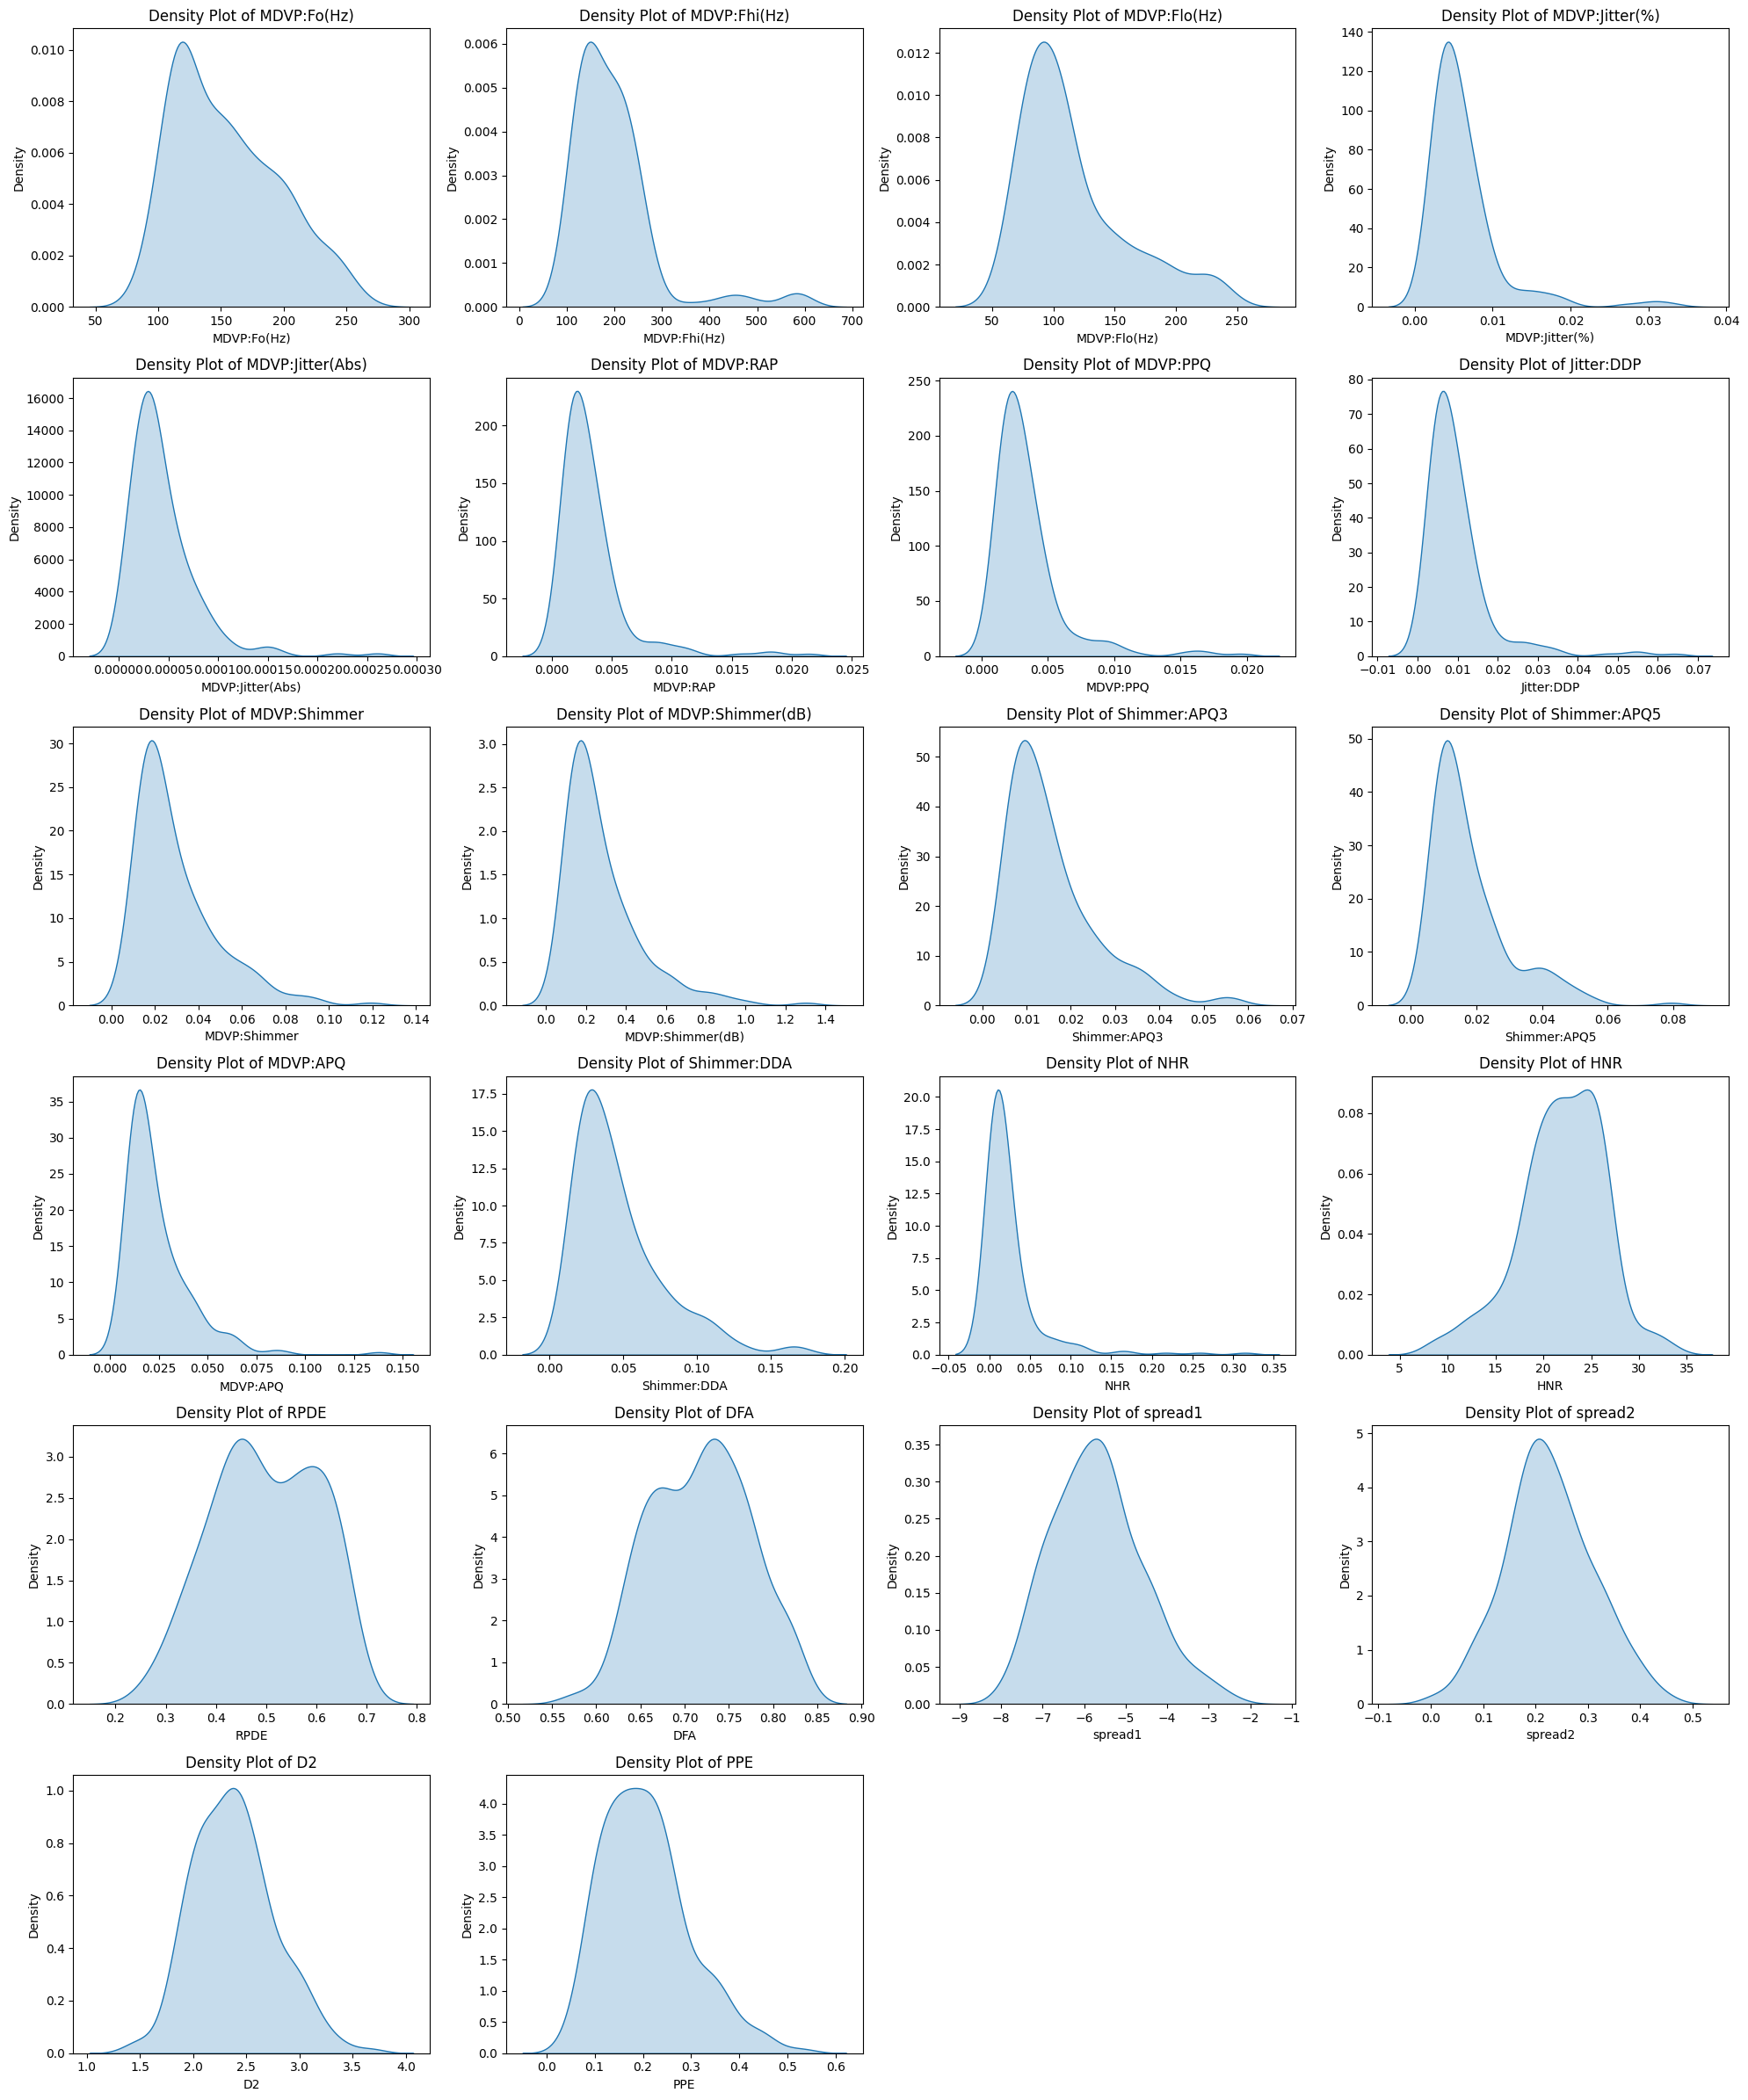

In [11]:
n_cols = 4
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()  # Flatten in case of 1D array handling

# Plot each KDE in a subplot
for i, col in enumerate(numeric_cols):
    sns.kdeplot(data=data_numeric[col], ax=axes[i], shade=True)
    axes[i].set_title(f'Density Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

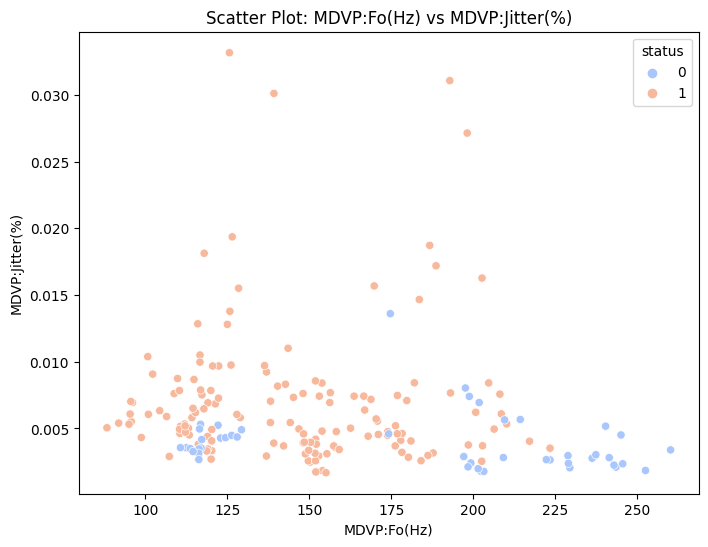

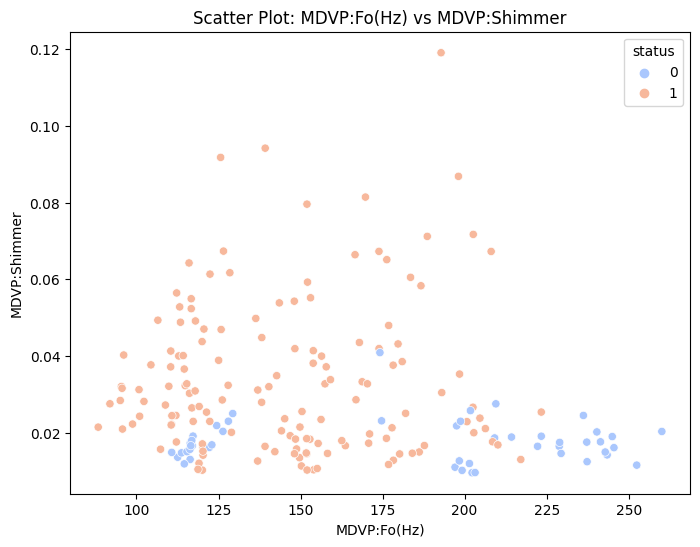

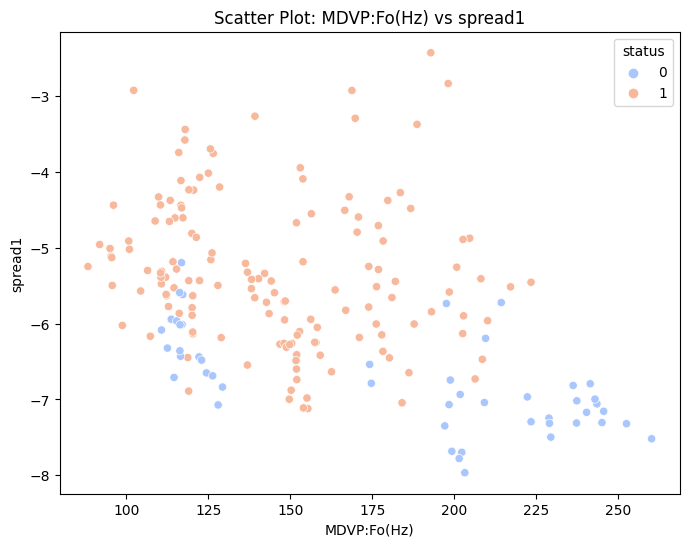

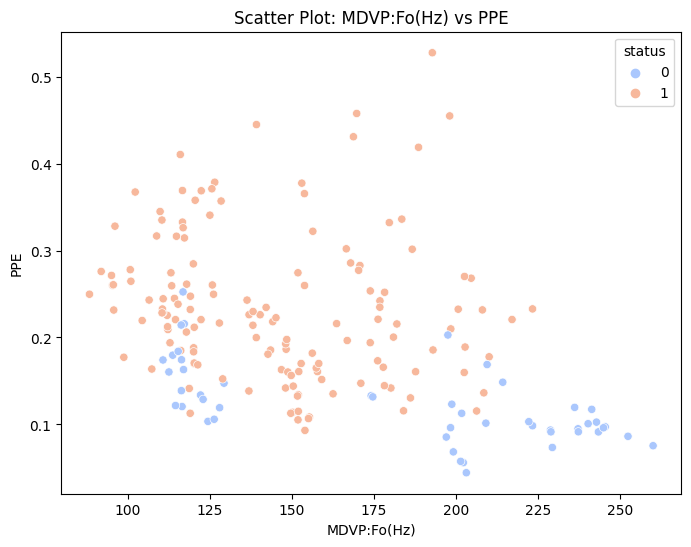

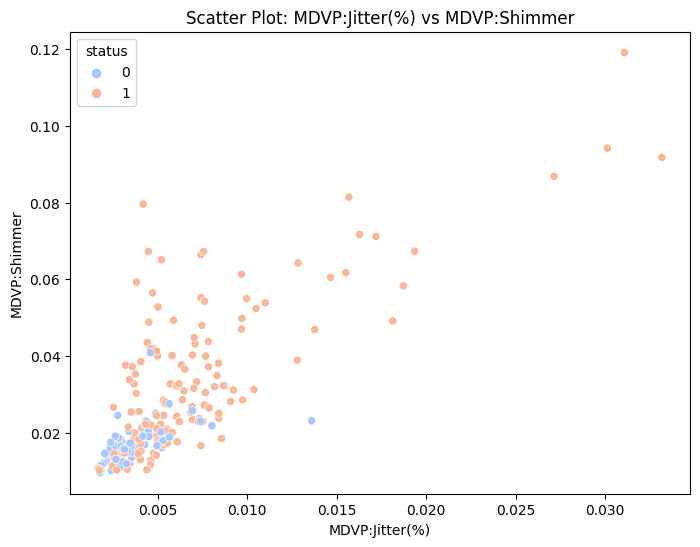

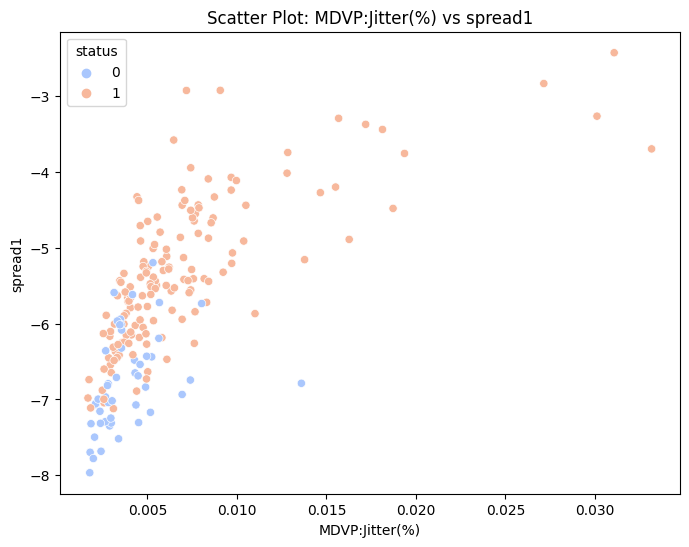

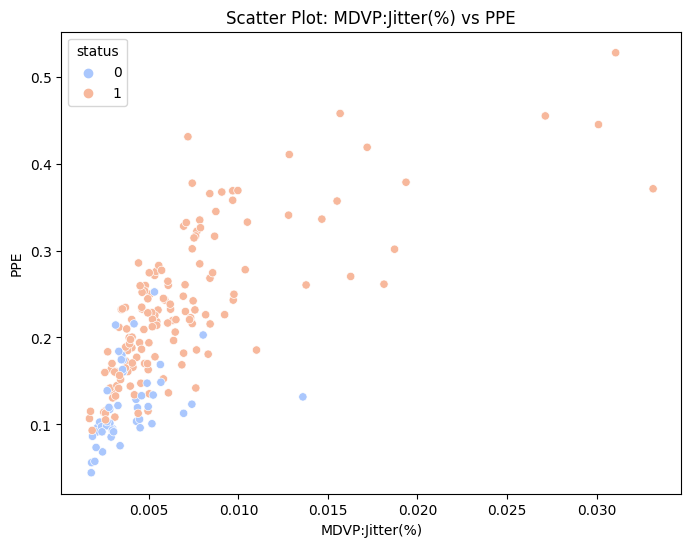

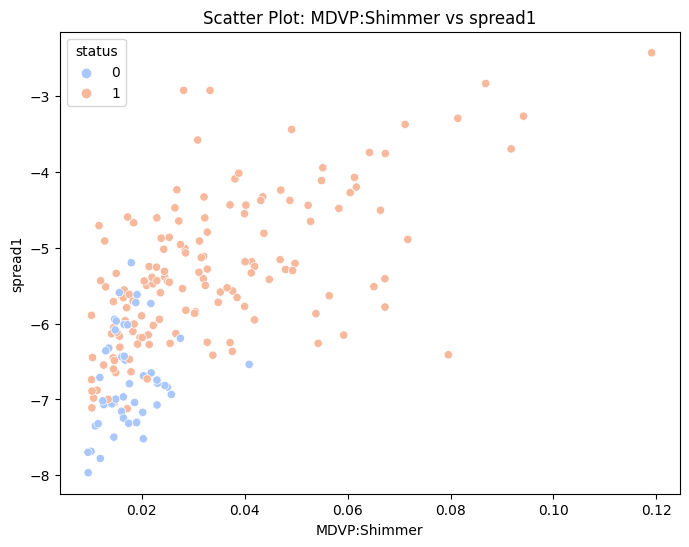

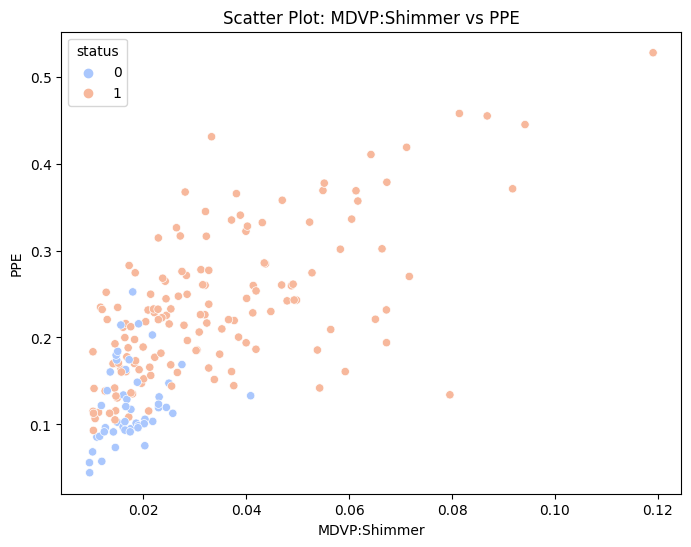

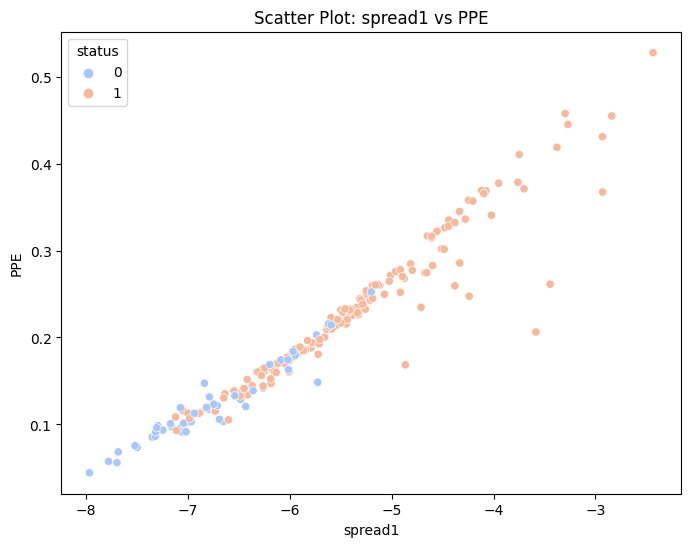

In [12]:
selected_features = ['MDVP:Fo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Shimmer', 'spread1', 'PPE']
feature_pairs = list(combinations(selected_features, 2))
for x_col, y_col in feature_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=x_col, y=y_col, hue='status', palette='coolwarm')
    plt.title(f'Scatter Plot: {x_col} vs {y_col}')

    plt.show()

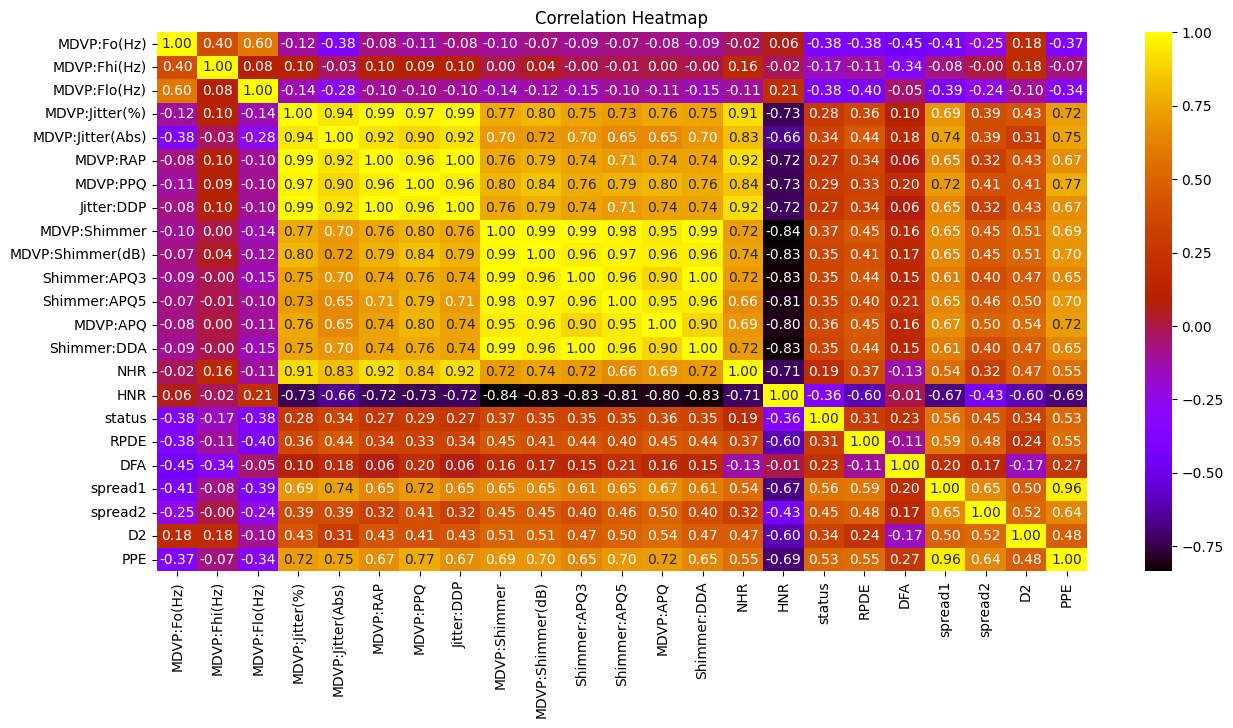

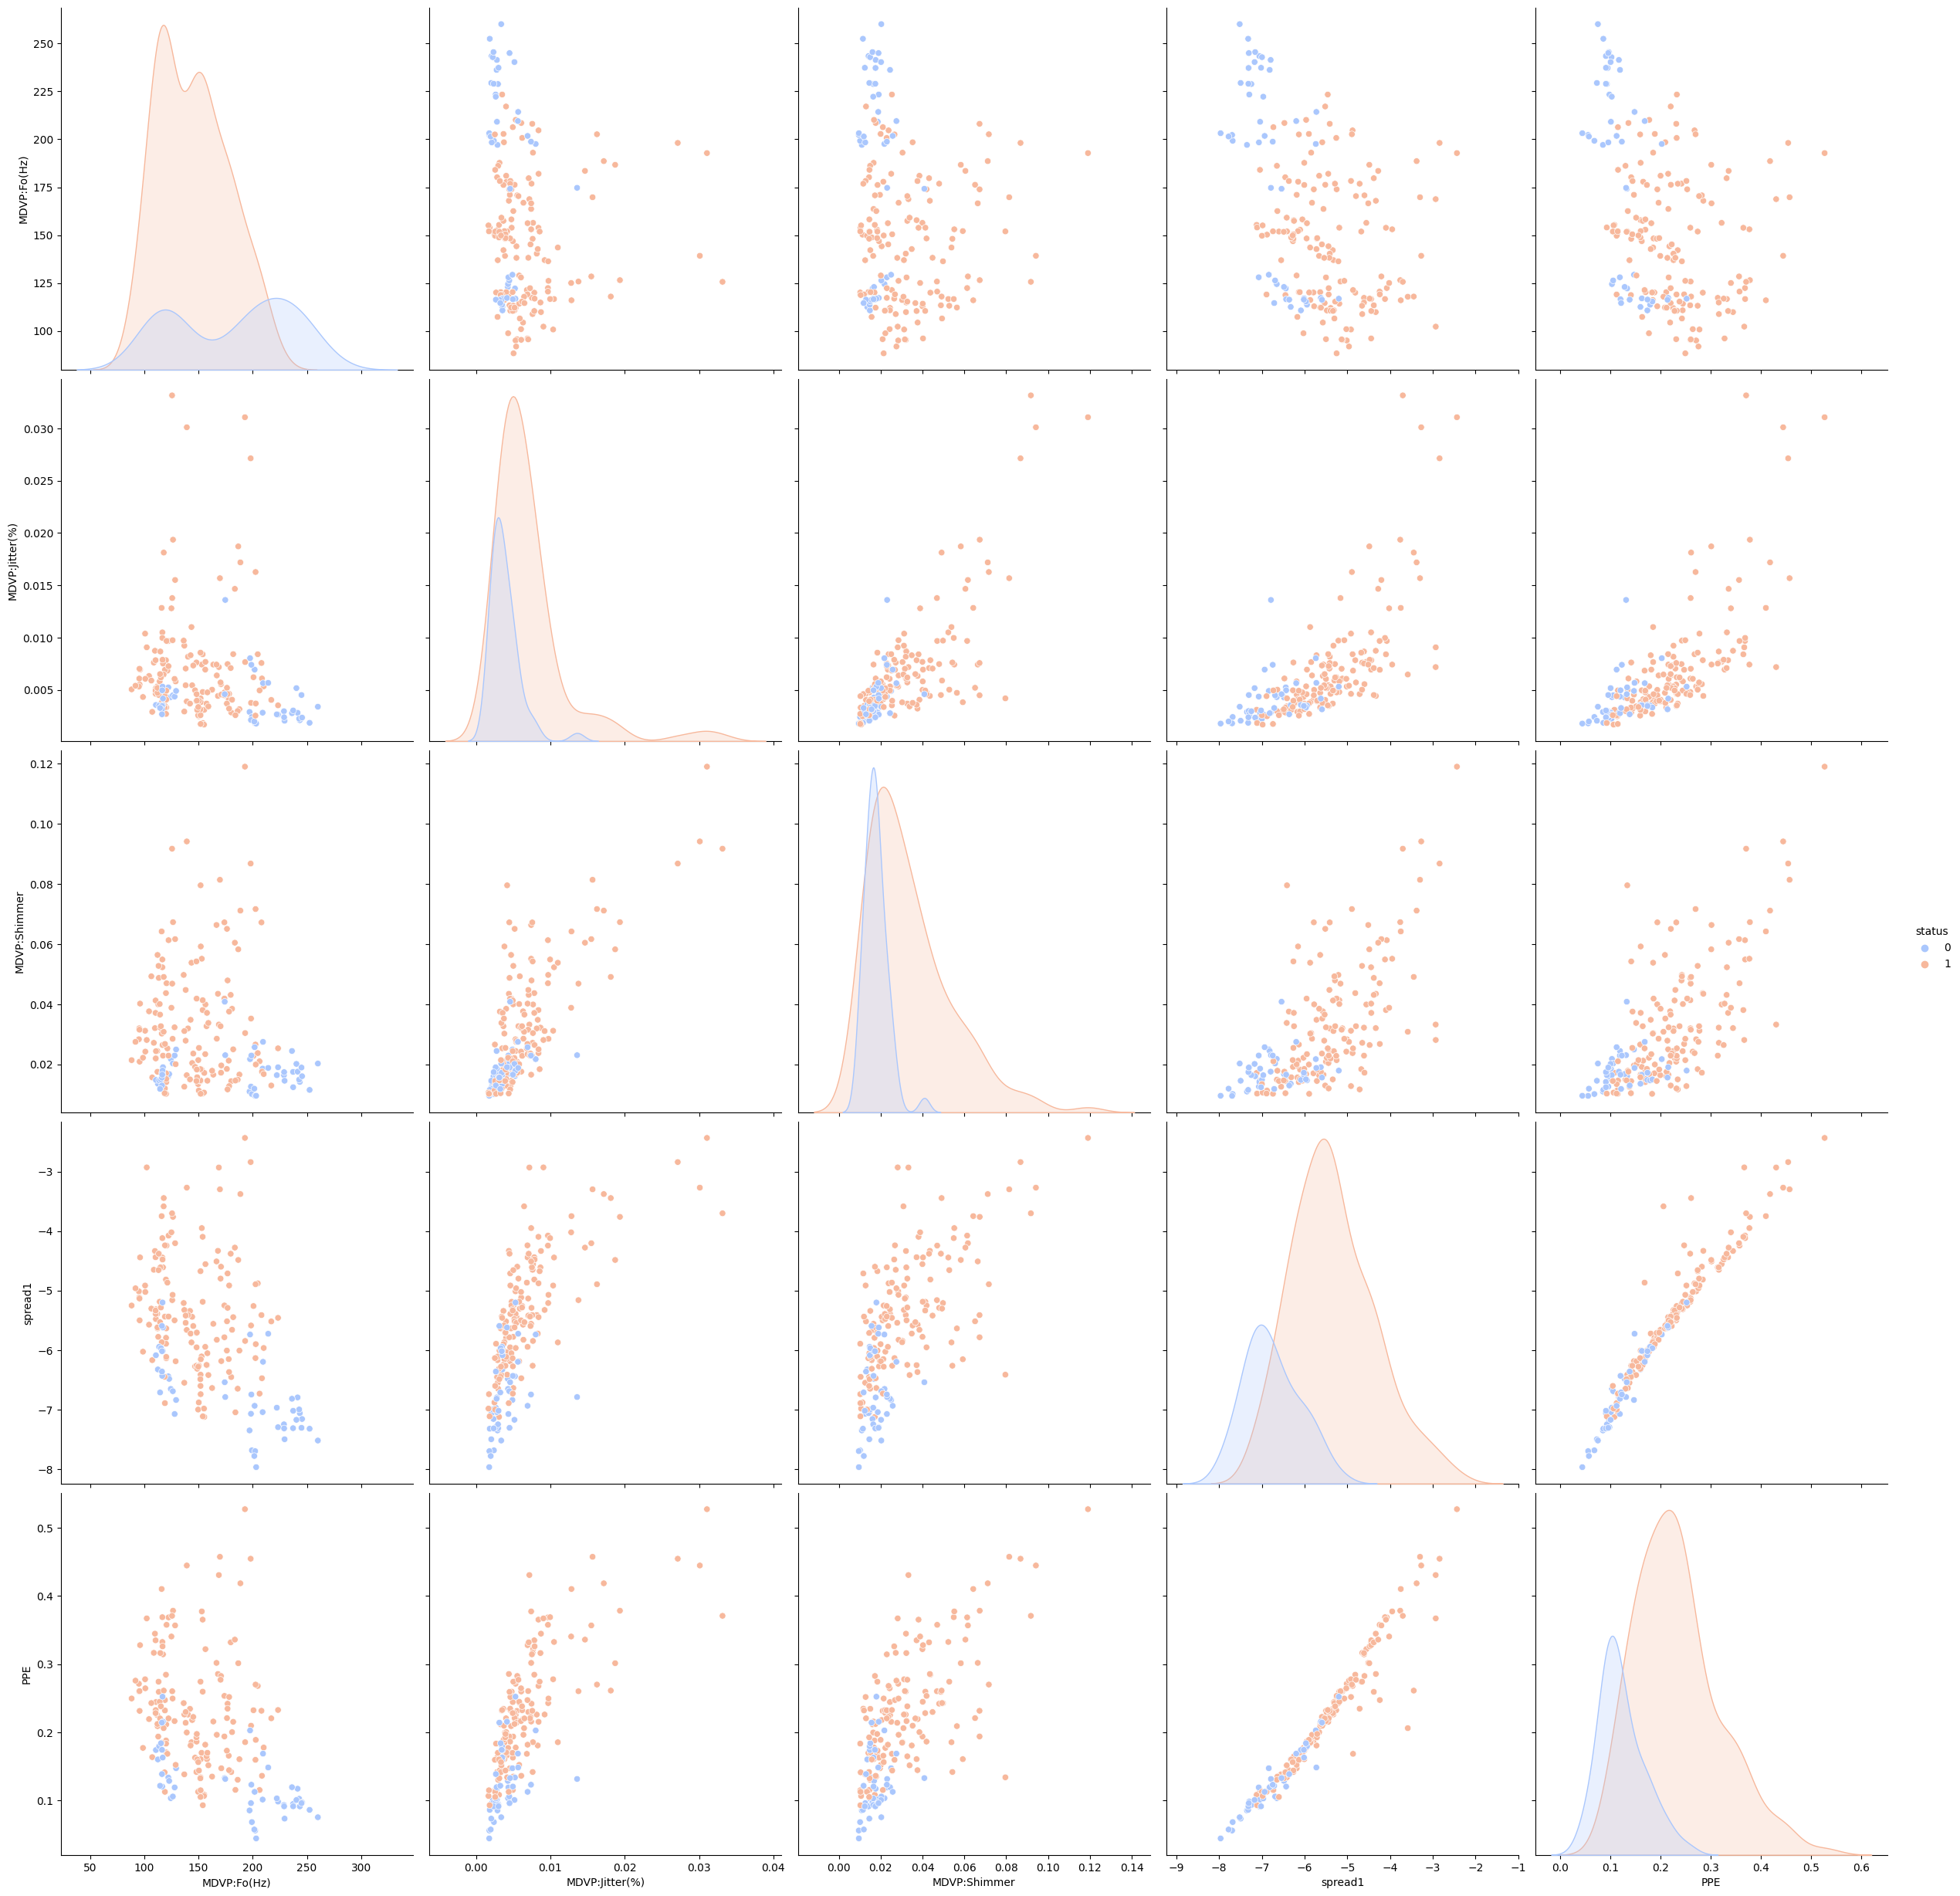

In [13]:
plt.figure(figsize=(15,7))
sns.heatmap(data_numeric.corr(), annot=True, cmap='gnuplot', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
# Pair Plot for selected features
sns.pairplot(df, vars=selected_features, hue='status', palette='coolwarm',height=5)
plt.show()

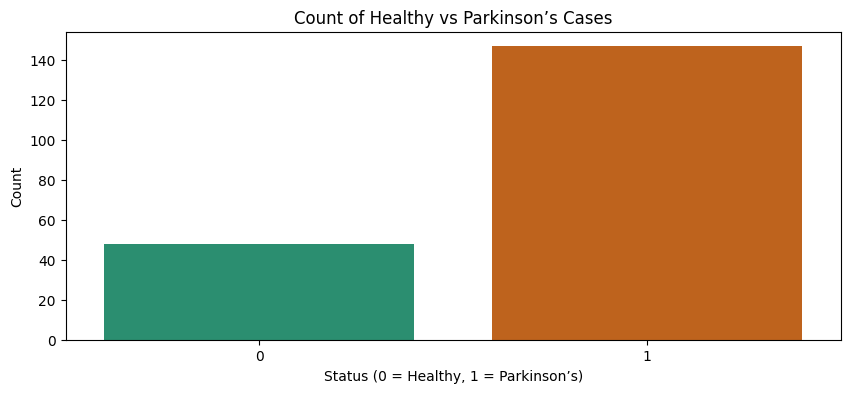

In [14]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='status',palette="Dark2")
plt.title('Count of Healthy vs Parkinson’s Cases')
plt.xlabel('Status (0 = Healthy, 1 = Parkinson’s)')
plt.ylabel('Count')
plt.show()

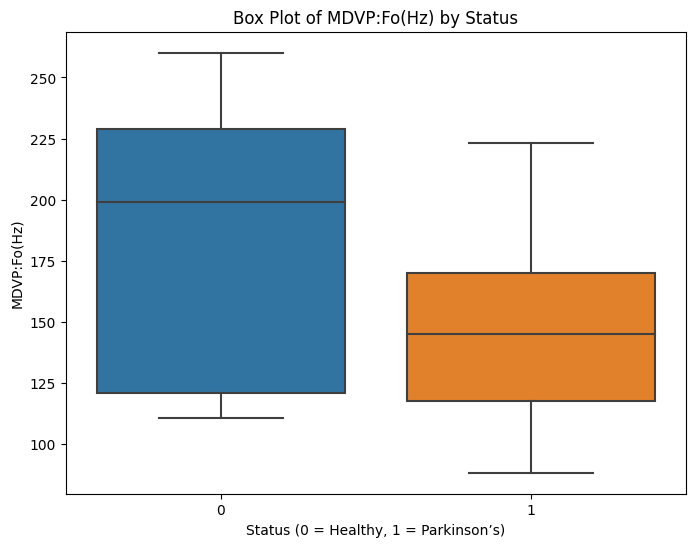

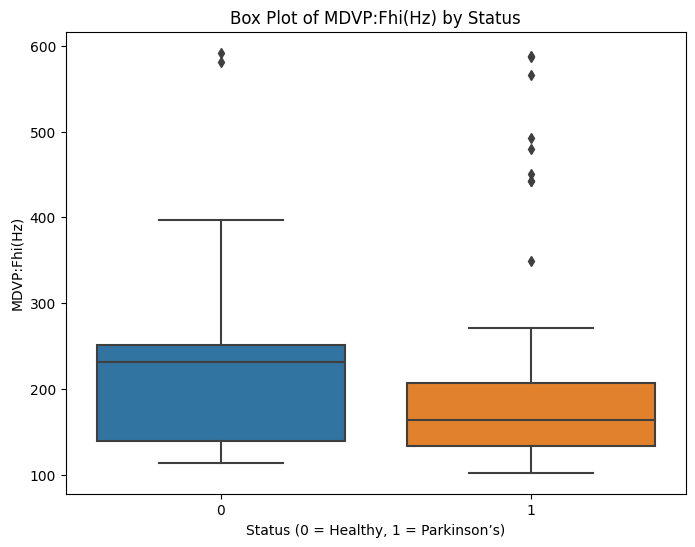

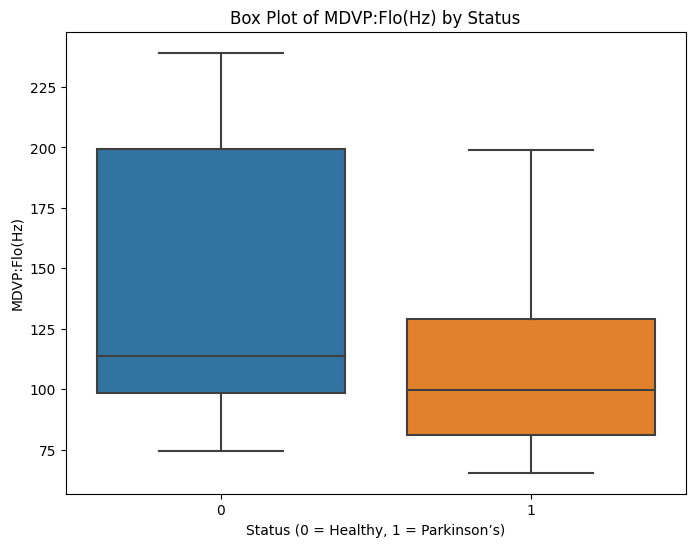

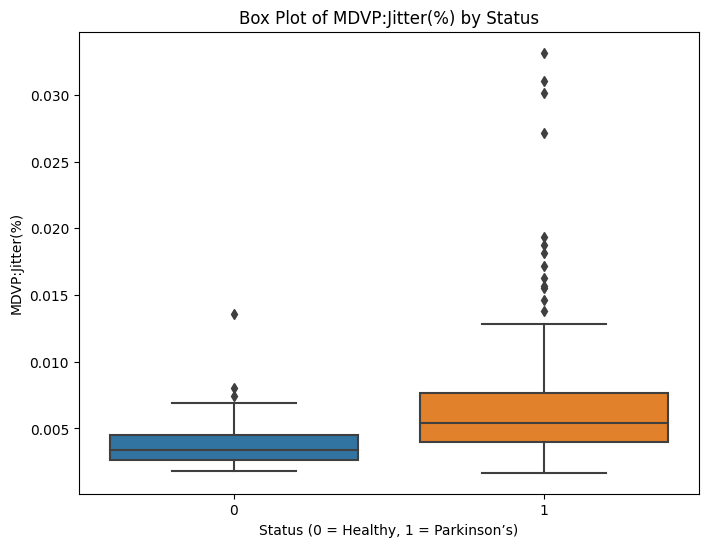

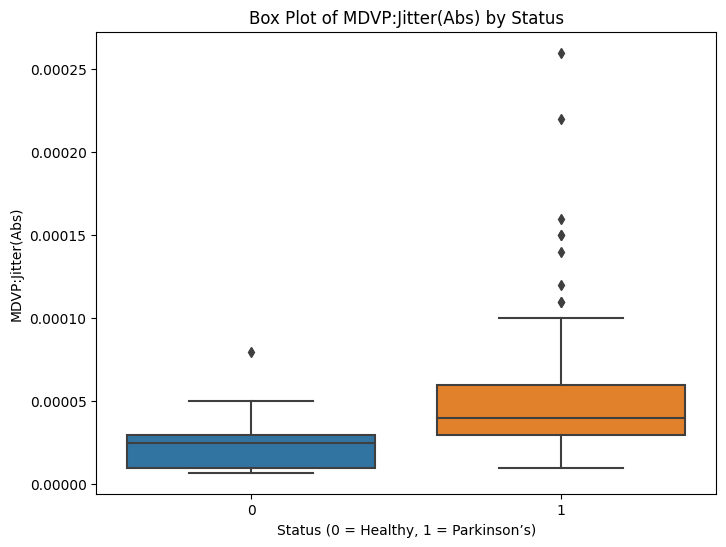

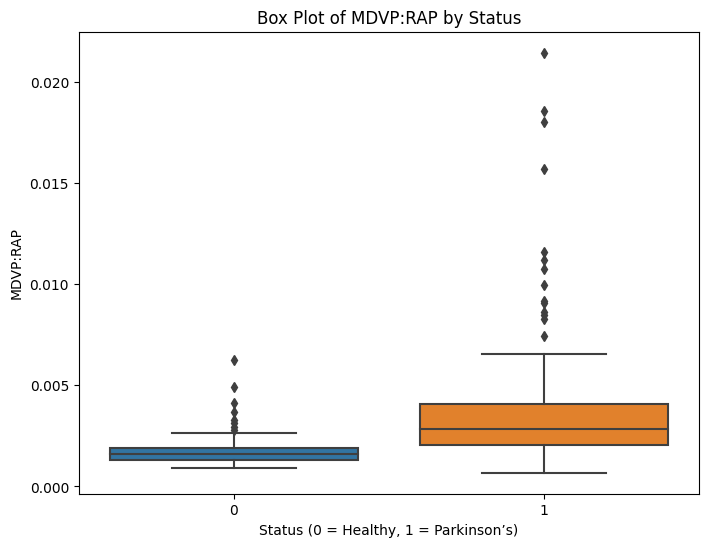

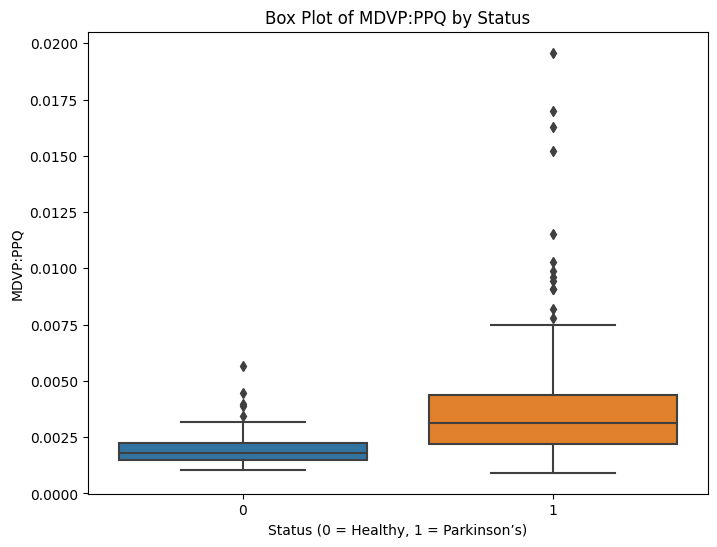

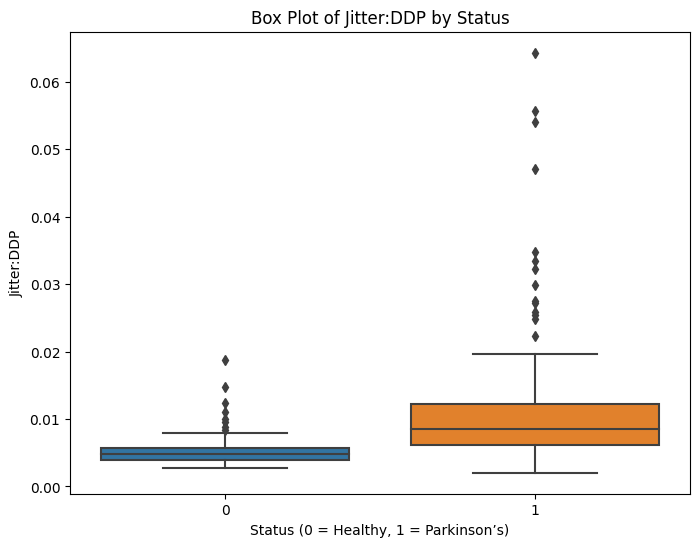

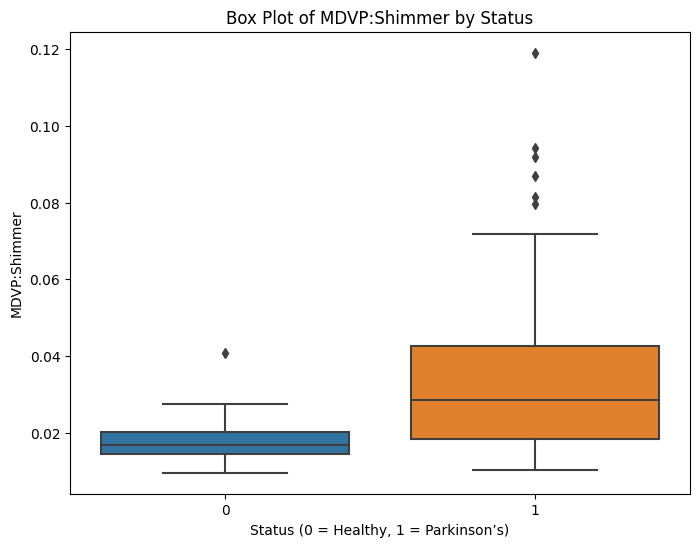

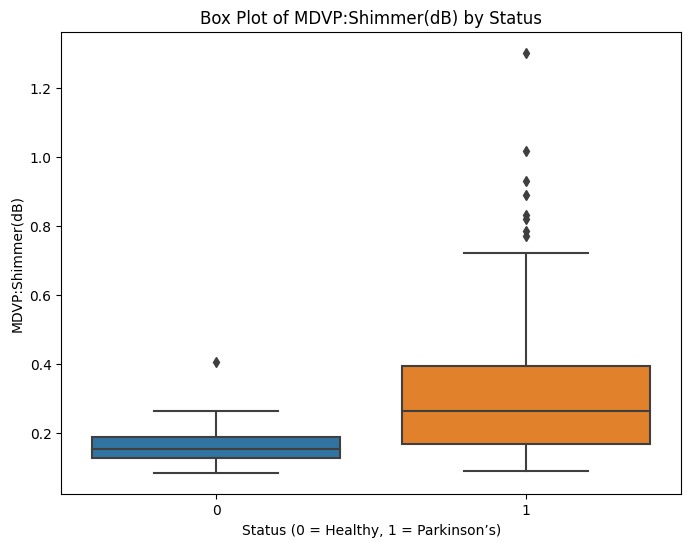

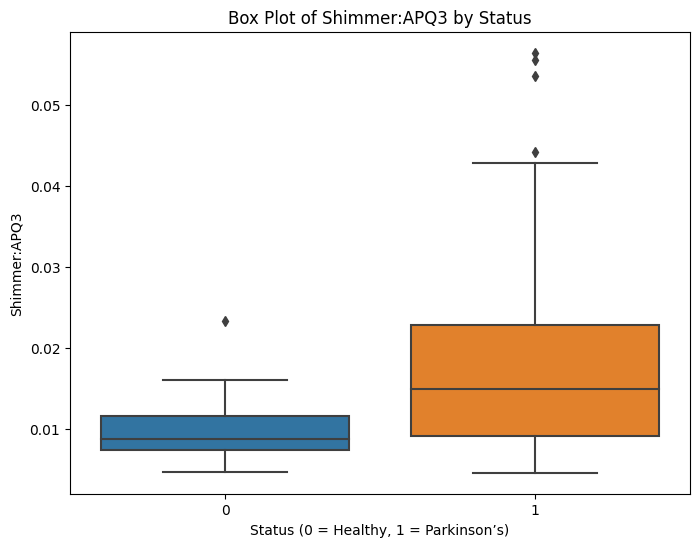

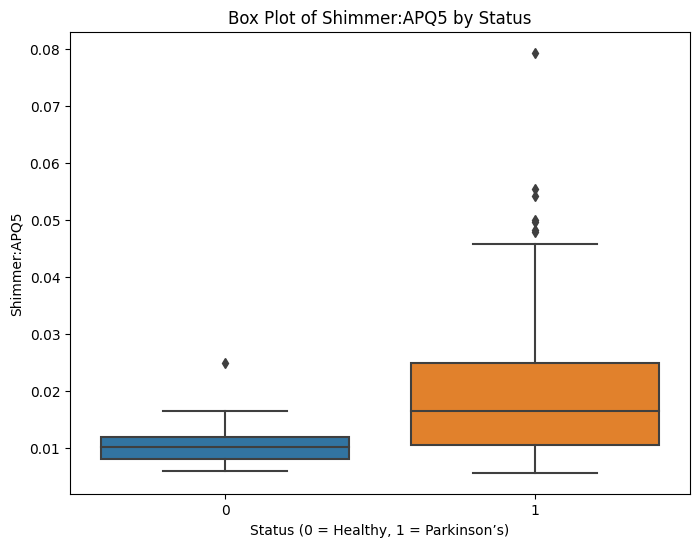

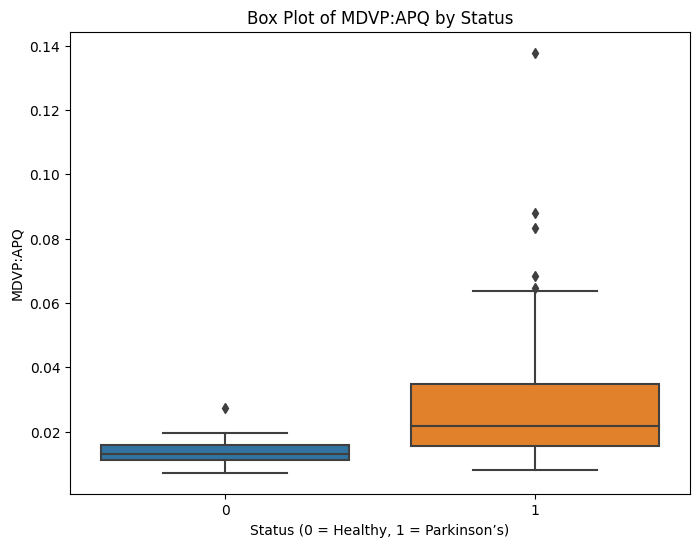

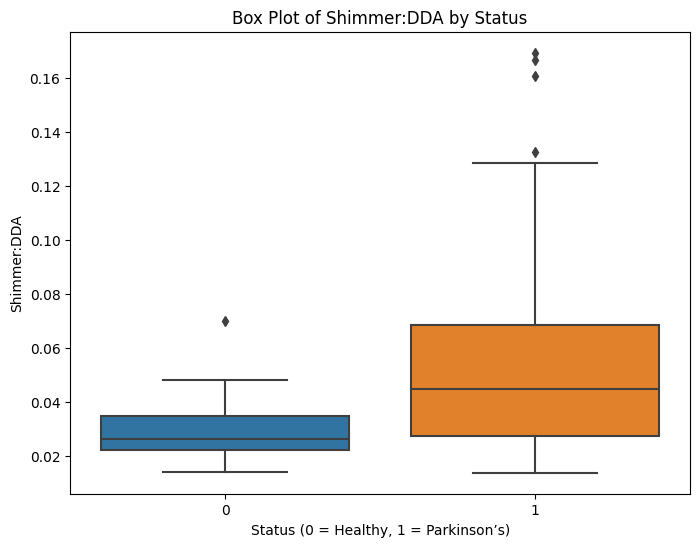

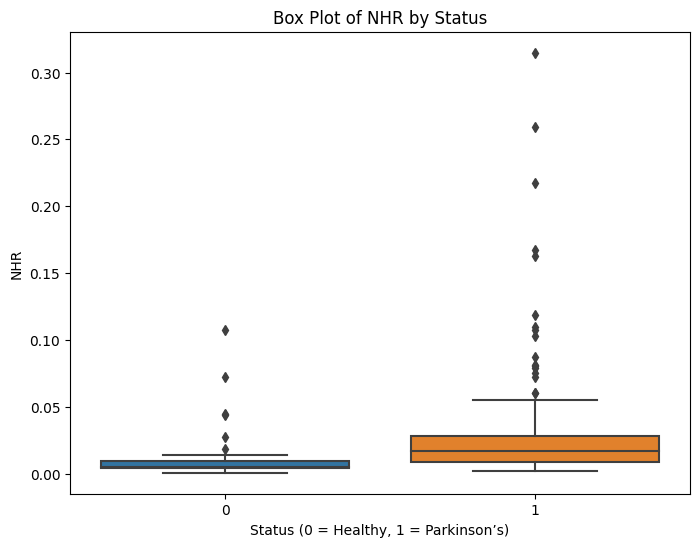

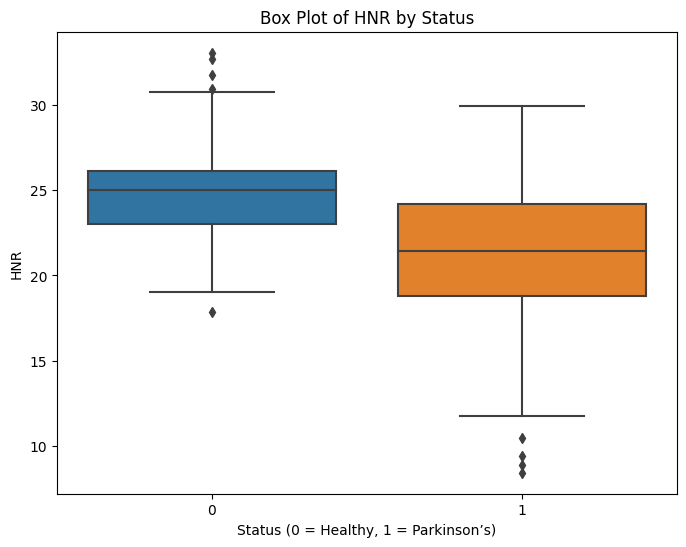

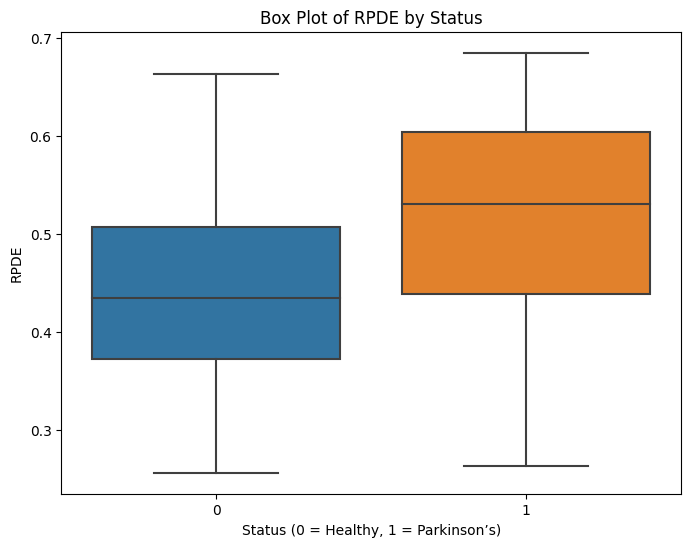

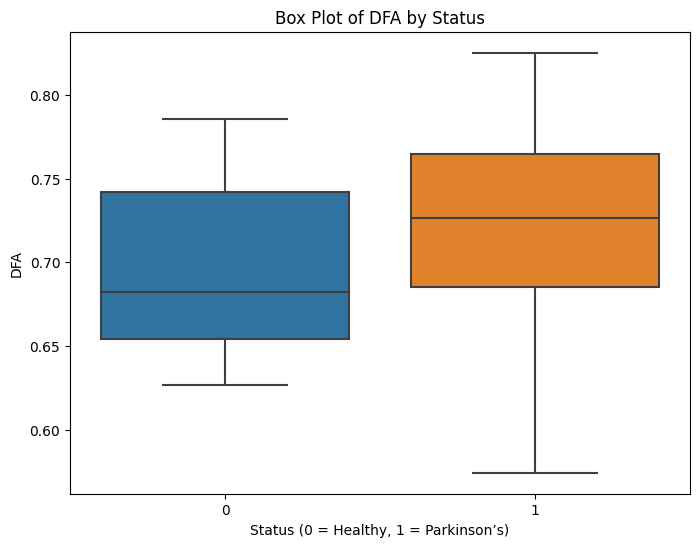

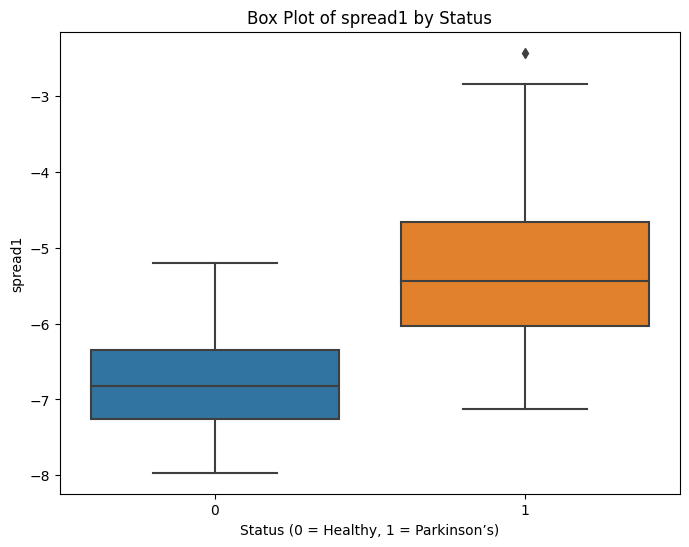

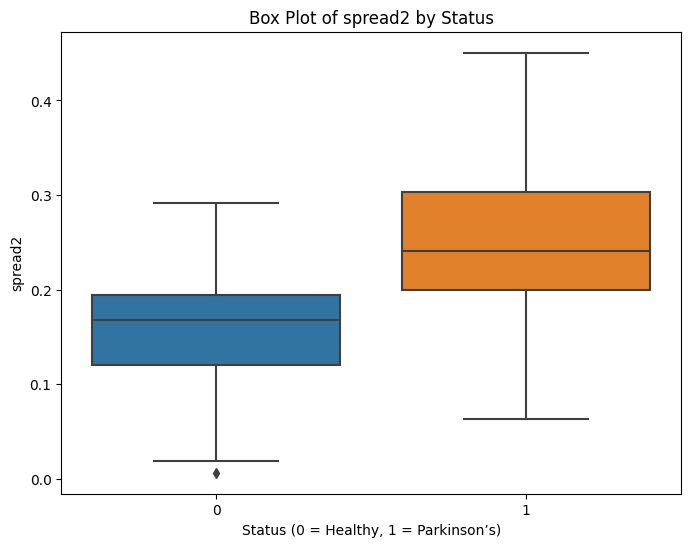

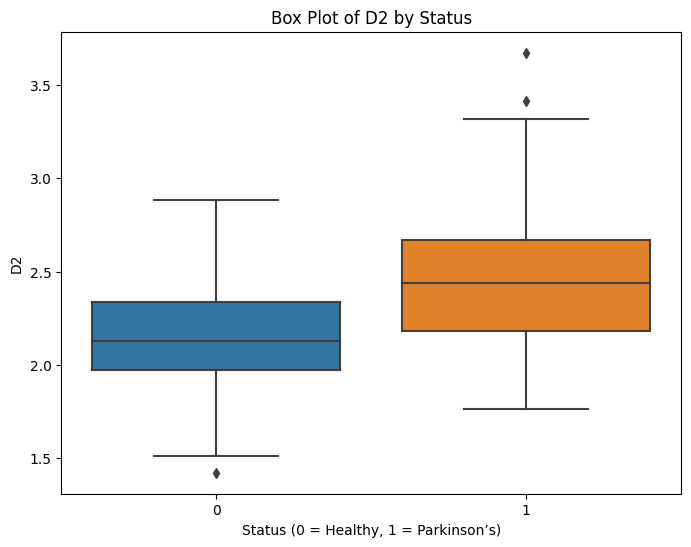

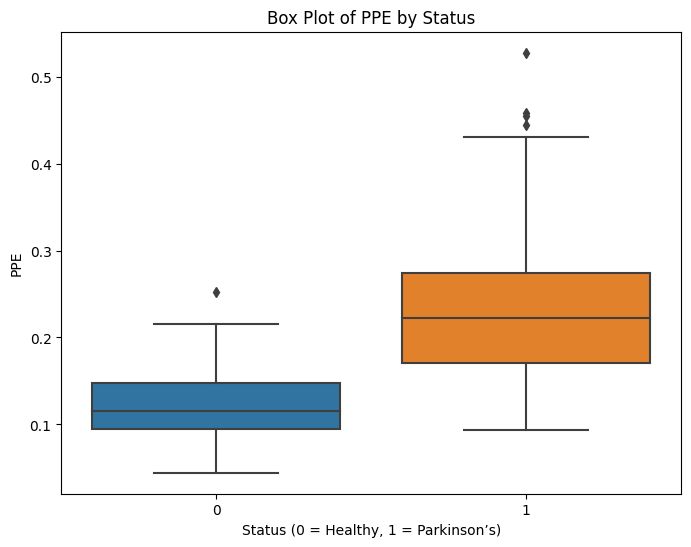

In [15]:
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='status', y=col)
    plt.title(f'Box Plot of {col} by Status')
    plt.xlabel('Status (0 = Healthy, 1 = Parkinson’s)')
    plt.ylabel(col)
    plt.show()

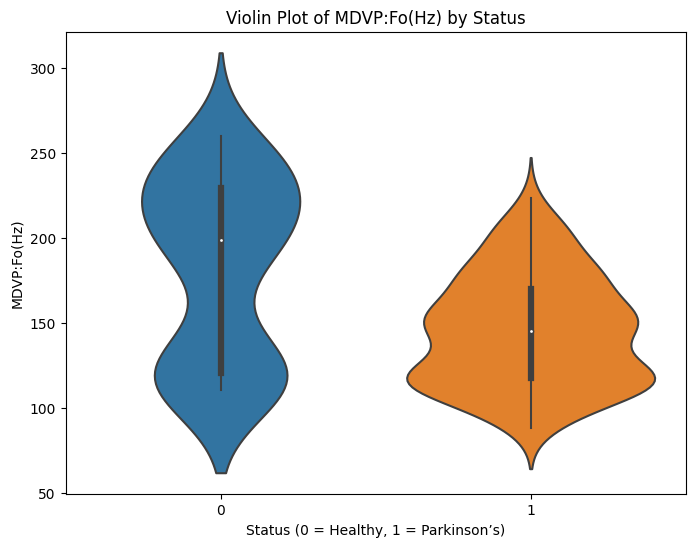

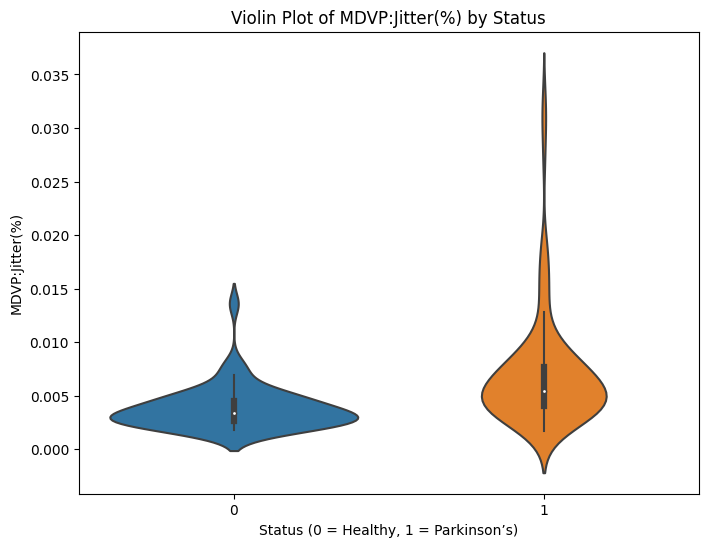

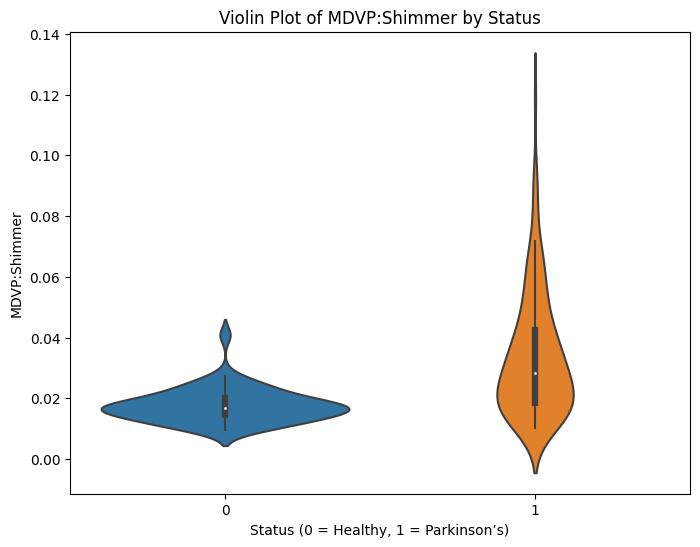

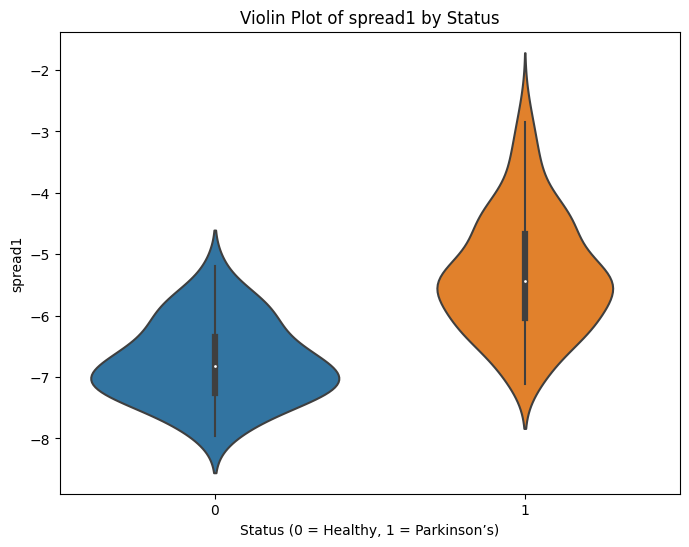

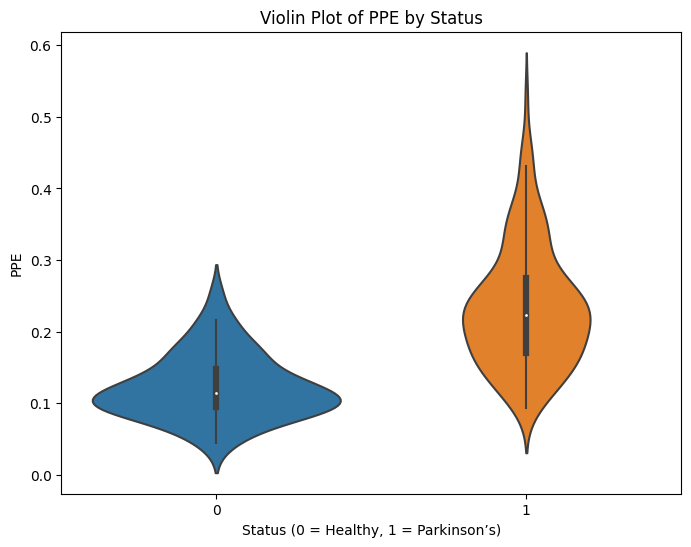

In [16]:
for col in selected_features:
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=df, x='status', y=col)
    plt.title(f'Violin Plot of {col} by Status')
    plt.xlabel('Status (0 = Healthy, 1 = Parkinson’s)')
    plt.ylabel(col)
    plt.show()

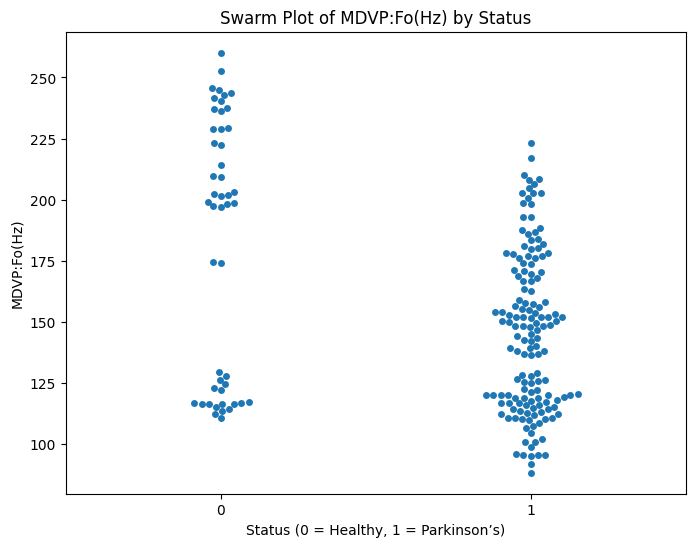

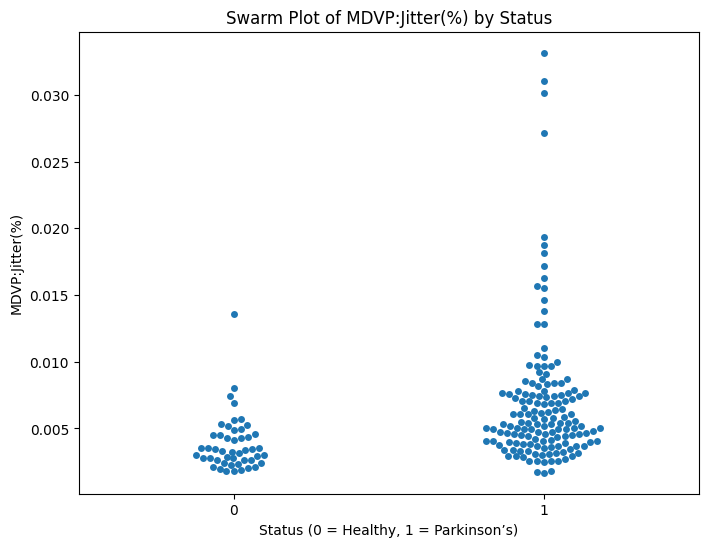

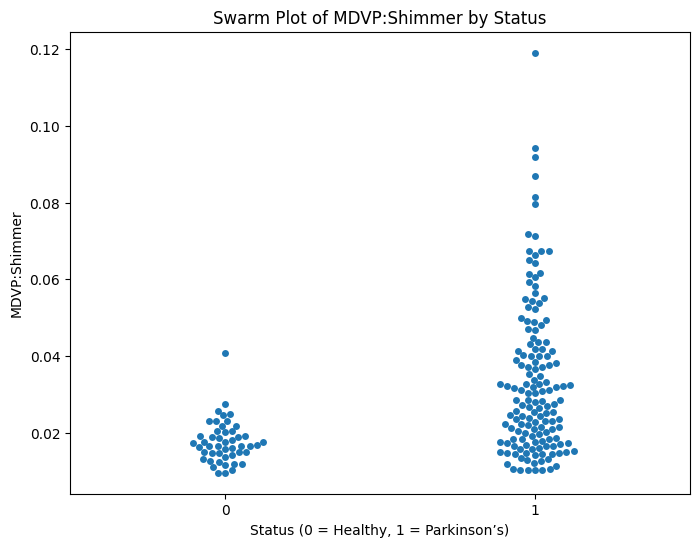

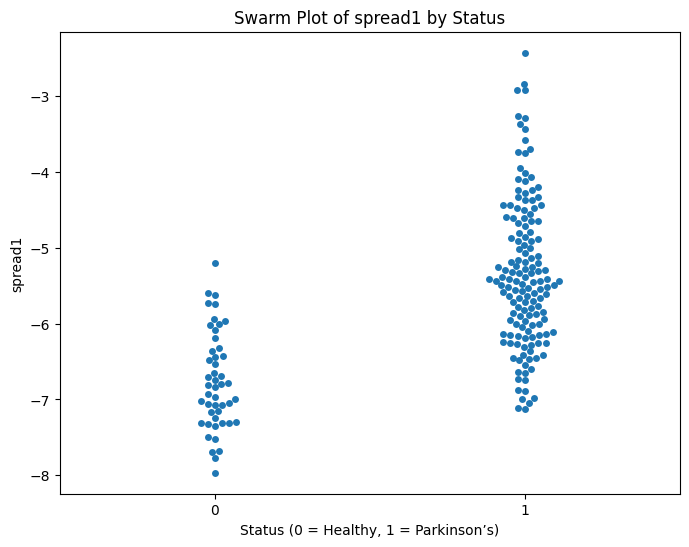

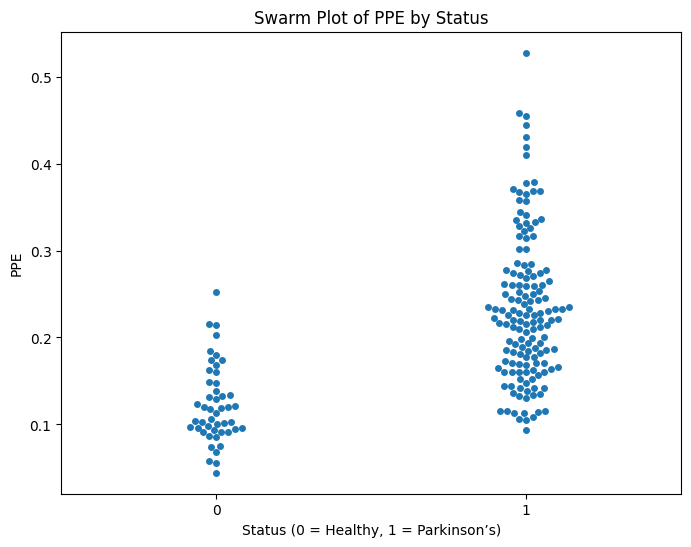

In [17]:
for col in selected_features:
    plt.figure(figsize=(8, 6))
    sns.swarmplot(data=df, x='status', y=col)
    plt.title(f'Swarm Plot of {col} by Status')
    plt.xlabel('Status (0 = Healthy, 1 = Parkinson’s)')
    plt.ylabel(col)
  
    plt.show()

In [18]:
# 3D Scatter Plot
fig_3d = px.scatter_3d(
    df,
    x='MDVP:Fo(Hz)',
    y='MDVP:Jitter(%)',
    z='MDVP:Shimmer',
    color='status',
    title='3D Scatter Plot: Fo, Jitter, Shimmer'
)
fig_3d.show()

# Parallel Coordinates Plot
fig_parallel = go.Figure(
    data=go.Parcoords(
        line=dict(color=df['status'], colorscale='Viridis'),
        dimensions=[dict(label=col, values=df[col]) for col in selected_features]
    )
)
fig_parallel.update_layout(title='Parallel Coordinates Plot')
fig_parallel.show()


In [19]:
df.drop(columns=["name"],axis=1,inplace=True)

In [20]:
df.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  \
0   0.00370   0.00554     0.01109       0.04374             0.426   
1   0.00465   0.00696     0.01394       0.06134             0.626   
2   0.00544   0.00781     0.01633       0.05233             0.482   
3   0.00502   0.00698     0.01505       0.05492             0.517   
4   0.00655   0.00908     0.01966       0.06425             0.584   

   Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA      NHR     HNR  status  \
0       0.02182       0.03130   0.02971      0.06545  0.02211  21.033       1   
1       0.03134       0.04518   0.04368      0.09403  0.01929  19.085       1   
2       0.02757       0.03858   0.03590      0.08270  0.01309  20.651       1   
3       0.02924       0.04005   0.03772      0.08771  0.01353  20.644       1   
4       0.03490       0.04825   0.04465      0.10470  0.01767  19.649       1   

       RPDE       DFA   spread1   spread2        D2       PPE  
0  0.414783  0.815285 -4.813031  0.266482  2.301442  0.284654  
1  0.458359  0.819521 -4.075192  0.335590  2.486855  0.368674  
2  0.429895  0.825288 -4.443179  0.311173  2.342259  0.332634  
3  0.434969  0.819235 -4.117501  0.334147  2.405554  0.368975  
4  0.417356  0.823484 -3.747787  0.234513  2.332180  0.410335

# Feature Selection with ANOVA F-test

In [21]:
from sklearn.feature_selection import SelectKBest, f_classif
X = df.drop(columns=['status'],axis=1)
y = df['status']


selector_anova = SelectKBest(score_func=f_classif, k=5)
selector_anova.fit(X, y)

SelectKBest(k=5)


# Get scores and selected features

In [22]:
anova_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector_anova.scores_})
anova_top_features = anova_scores.nlargest(5, 'Score')
print("Top 5 features (ANOVA F-test):")
print(anova_top_features)


Top 5 features (ANOVA F-test):
         Feature      Score
18       spread1  90.424219
21           PPE  75.803195
19       spread2  50.343165
0    MDVP:Fo(Hz)  33.286577
2   MDVP:Flo(Hz)  32.612875


# Visualize ANOVA F-test results

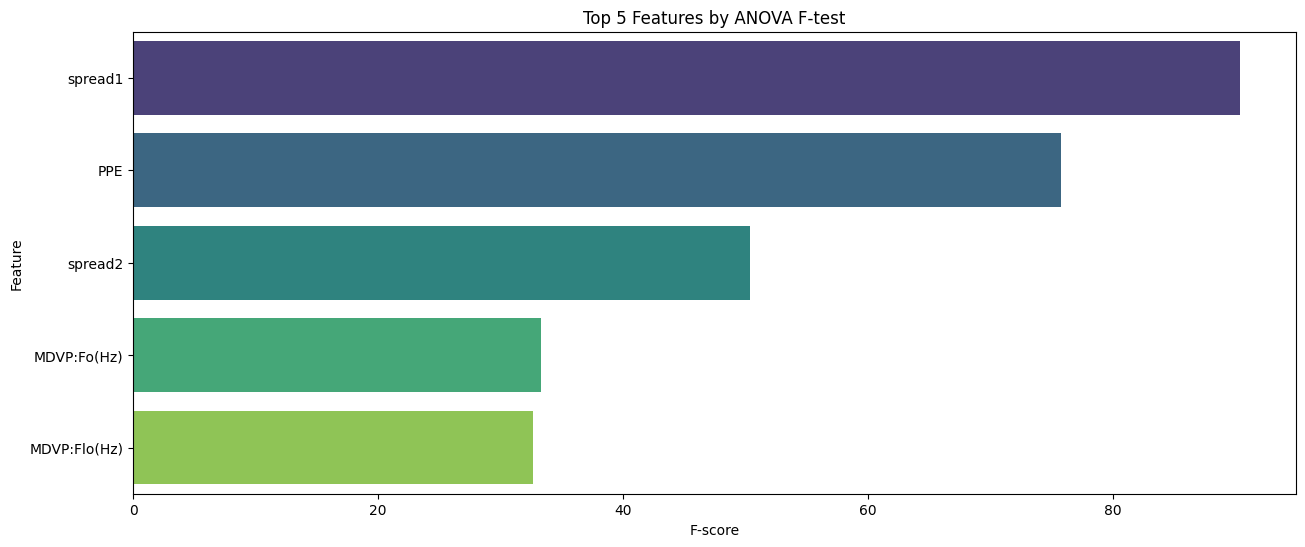

In [23]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Score', y='Feature', data=anova_top_features, palette='viridis')
plt.title('Top 5 Features by ANOVA F-test')
plt.xlabel('F-score')
plt.ylabel('Feature')
plt.show()


# Get the names of the top 5 features

In [24]:
top_5_features = anova_top_features['Feature'].values
# Create new dataset with top 5 features and status
new_data = df[top_5_features].copy()
new_data['status'] = df['status']
new_data.to_csv('parkinsons_top5.csv', index=False)
print("\nNew dataset saved as 'parkinsons_top5.csv' with columns:")


New dataset saved as 'parkinsons_top5.csv' with columns:


# Read New Data

In [25]:
df=pd.read_csv("/kaggle/working/parkinsons_top5.csv")

In [26]:
df.head()

spread1       PPE   spread2  MDVP:Fo(Hz)  MDVP:Flo(Hz)  status
0 -4.813031  0.284654  0.266482      119.992        74.997       1
1 -4.075192  0.368674  0.335590      122.400       113.819       1
2 -4.443179  0.332634  0.311173      116.682       111.555       1
3 -4.117501  0.368975  0.334147      116.676       111.366       1
4 -3.747787  0.410335  0.234513      116.014       110.655       1

In [27]:
df.shape

(195, 6)

In [28]:
df.isnull().sum()

spread1         0
PPE             0
spread2         0
MDVP:Fo(Hz)     0
MDVP:Flo(Hz)    0
status          0
dtype: int64

# Split Dataset

In [29]:
X = df.drop(columns=['status'])
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (156, 5)
Testing set size: (39, 5)


# Build Model

In [31]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=300,task_type="GPU")
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

0:	learn: 0.5967839	total: 8.82s	remaining: 2h 26m 51s
300:	learn: 0.0055140	total: 17.3s	remaining: 40.2s
600:	learn: 0.0025160	total: 26s	remaining: 17.3s
900:	learn: 0.0016351	total: 34.6s	remaining: 3.81s
999:	learn: 0.0015001	total: 37.5s	remaining: 0us
Accuracy: 0.8461538461538461
Precision: 0.9259259259259259
Recall: 0.8620689655172413
F1 Score: 0.8928571428571429

Confusion Matrix:
 [[ 8  2]
 [ 4 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.93      0.86      0.89        29

    accuracy                           0.85        39
   macro avg       0.80      0.83      0.81        39
weighted avg       0.86      0.85      0.85        39



# ROC Curve

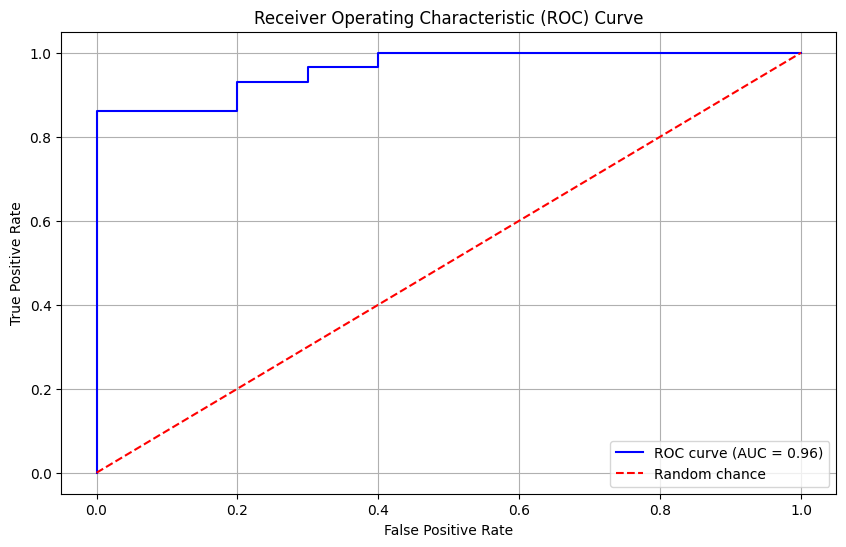

In [32]:
from sklearn.metrics import roc_curve, auc
# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--', label='Random chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

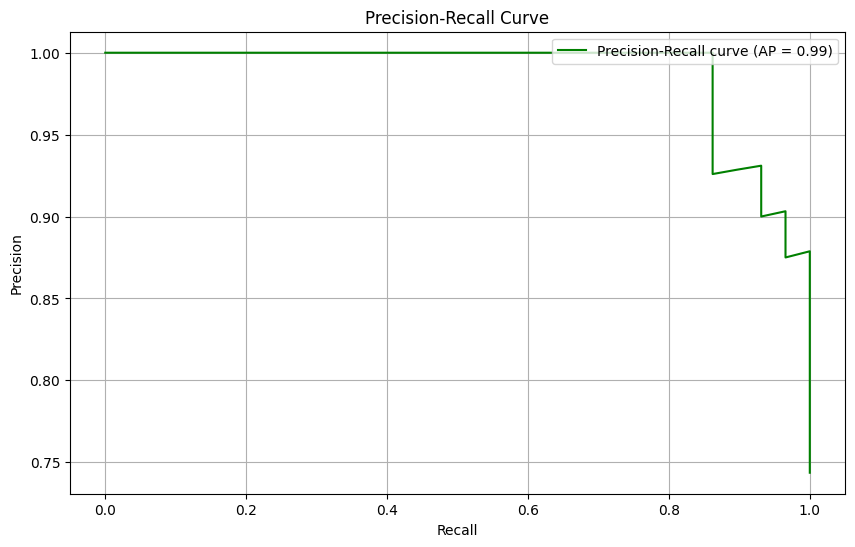

In [33]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate precision-recall pairs for different probability thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Calculate average precision score (area under precision-recall curve)
avg_precision = average_precision_score(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(10,6))
plt.plot(recall, precision, color='green', label=f'Precision-Recall curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Save Model

In [34]:
import pickle
file=open("catboost_model.pkl","wb")
pickle.dump(model,file)
file.close()

In [35]:
! pip freeze

absl-py==1.4.0
accelerate==1.5.2
aiofiles==22.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.11.18
aiosignal==1.3.2
aiosqlite==0.21.0
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.5
ale-py==0.10.2
alembic==1.15.2
altair==5.5.0
annotated-types==0.7.0
annoy==1.17.3
ansicolors==1.1.8
antlr4-python3-runtime==4.9.3
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
args==0.1.0
array_record==0.7.1
arrow==1.3.0
arviz==0.21.0
astropy==7.0.1
astropy-iers-data==0.2025.3.31.0.36.18
asttokens==3.0.0
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
bayesian-optimization==2.0.3
beartype==0.20.2
beautifulsoup4==4.13.3
betterproto==2.0.0b6
bigframes==1.42.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.2.1
blobfile==3.0.0
blosc2==3.2.1
bokeh==3.6.3
Boruta==0.4.3
boto3==1.38.11
botocore==1.38.11
Bottleneck==1.4.2
-e git+https://github.com/SohierDane/BigQuery_Helper@8615a7f6c1663e7f2d48aa2b32c2dbcb600a440f#egg=bq_helper